# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: **12.10.2022**

Мягкий дедлайн: **1.11.22 23:59** (за каждый день просрочки снимается 1 балл)

Жесткий дедлайн: **8.11.22 23:59**

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: ...

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0 баллов).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.

$$
   \nabla_{w} Q(w) = \dfrac{2}{n} X^T \left( Xw - y \right)
$$

### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

![](adam_meme.png)

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение 

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

## Задание 3. Проверка кода (0 баллов)

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [3]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [4]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [ ]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/41257/enter/).

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **VanillaGradientDescent**:


* **StochasticDescent**:


* **MomentumDescent**:


* **Adam**:


* **LinearRegression**:

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте, какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте, какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid')

In [2]:
data = pd.read_csv('autos.csv')

In [4]:
data.head()

brand    model vehicleType  gearbox fuelType notRepairedDamage  \
0  volkswagen     golf  kleinwagen  manuell   benzin              nein   
1       skoda    fabia  kleinwagen  manuell   diesel              nein   
2         bmw      3er   limousine  manuell   benzin                ja   
3     peugeot  2_reihe      cabrio  manuell   benzin              nein   
4       mazda  3_reihe   limousine  manuell   benzin              nein   

   powerPS  kilometer  autoAgeMonths  price  
0       75     150000            177   1500  
1       69      90000             93   3600  
2      102     150000            246    650  
3      109     150000            140   2200  
4      105     150000            136   2000

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

In [4]:
# статистики целевой переменной

data.describe().price

count    241190.000000
mean       6887.741892
std        8024.451993
min           1.000000
25%        1750.000000
50%        4100.000000
75%        8999.000000
max       99999.000000
Name: price, dtype: float64

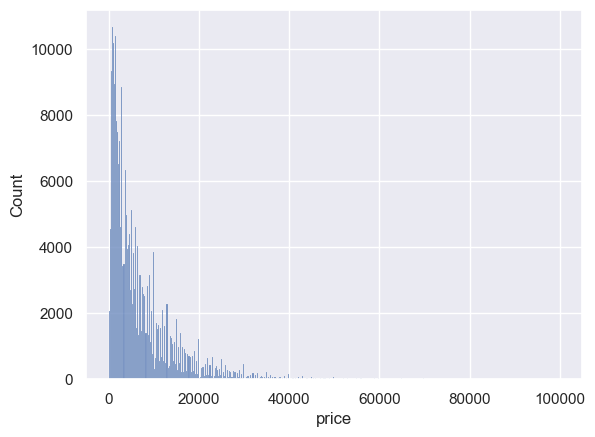

In [5]:
# распределение целевой переменной

sns.histplot(data.price);

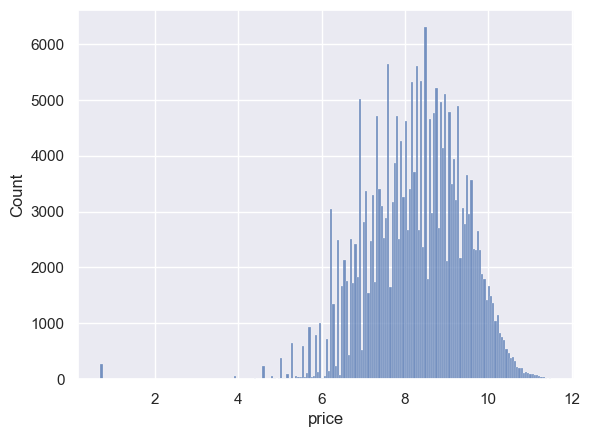

In [6]:
# логарифмическое распределение целевой переменной

sns.histplot(np.log(data.price + 1));

In [3]:
# прологарифмируем, чтобы предсказывать порядок цены и легче определить аномальные значения

data.loc[:, "log_price"] = np.log(data.price + 1)
data.drop('price', axis=1, inplace=True)

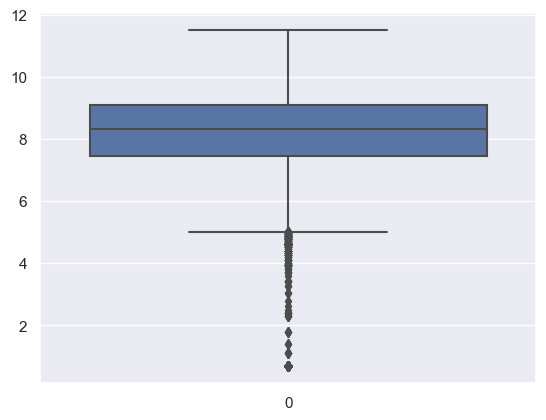

In [8]:
# высчитываем доверительный интервал

sns.boxplot(data.log_price);

In [4]:
# удаляем выбросы

data.drop(data[data.log_price < 5].log_price.index, axis=0, inplace=True)

<AxesSubplot: >

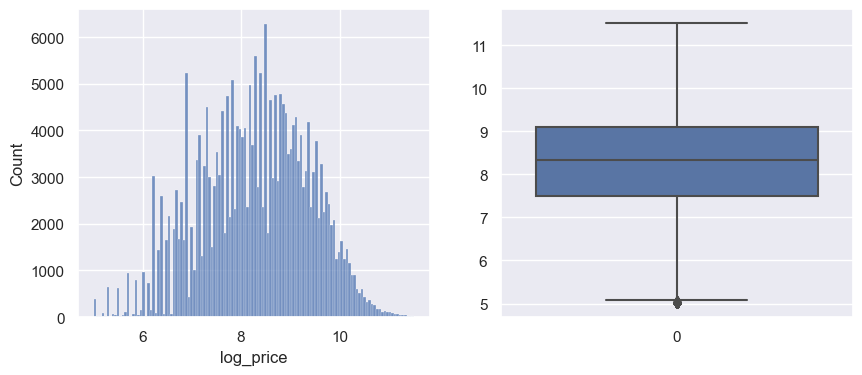

In [10]:
# данный без выбросов по цене
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(data.log_price)
plt.subplot(1, 2, 2)
sns.boxplot(data.log_price)

* Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака.

In [11]:
# тип столбцов

data.dtypes

brand                 object
model                 object
vehicleType           object
gearbox               object
fuelType              object
notRepairedDamage     object
powerPS                int64
kilometer              int64
autoAgeMonths          int64
log_price            float64
dtype: object

<AxesSubplot: xlabel='powerPS', ylabel='Count'>

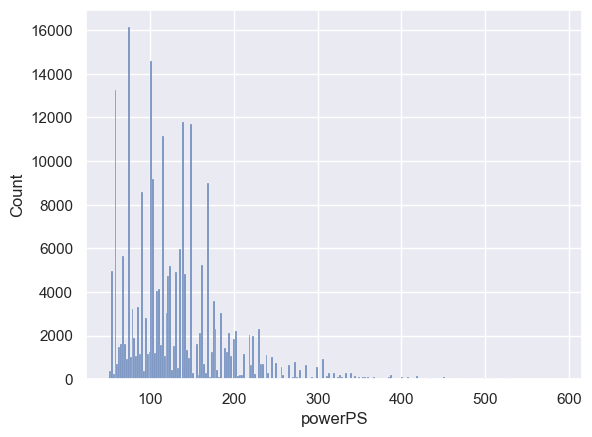

In [12]:
# распределение значений мощности

sns.histplot(data.powerPS)
# есть выбросы

<AxesSubplot: >

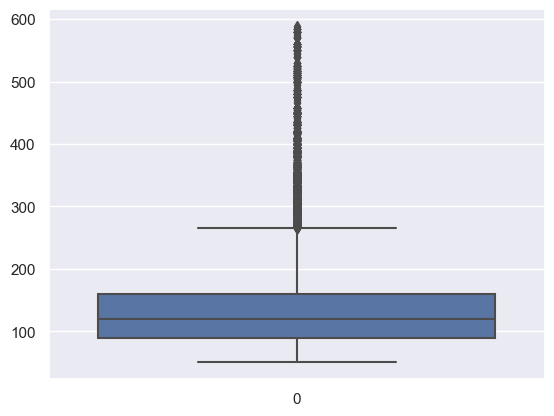

In [13]:
sns.boxplot(data.powerPS)
# большая часть значений лежит в интервале [~50, ~280];
# аномально маленьких значений нет;
# много аномально больших значений;
# выбросы плотно распределены

0.5521014087790639

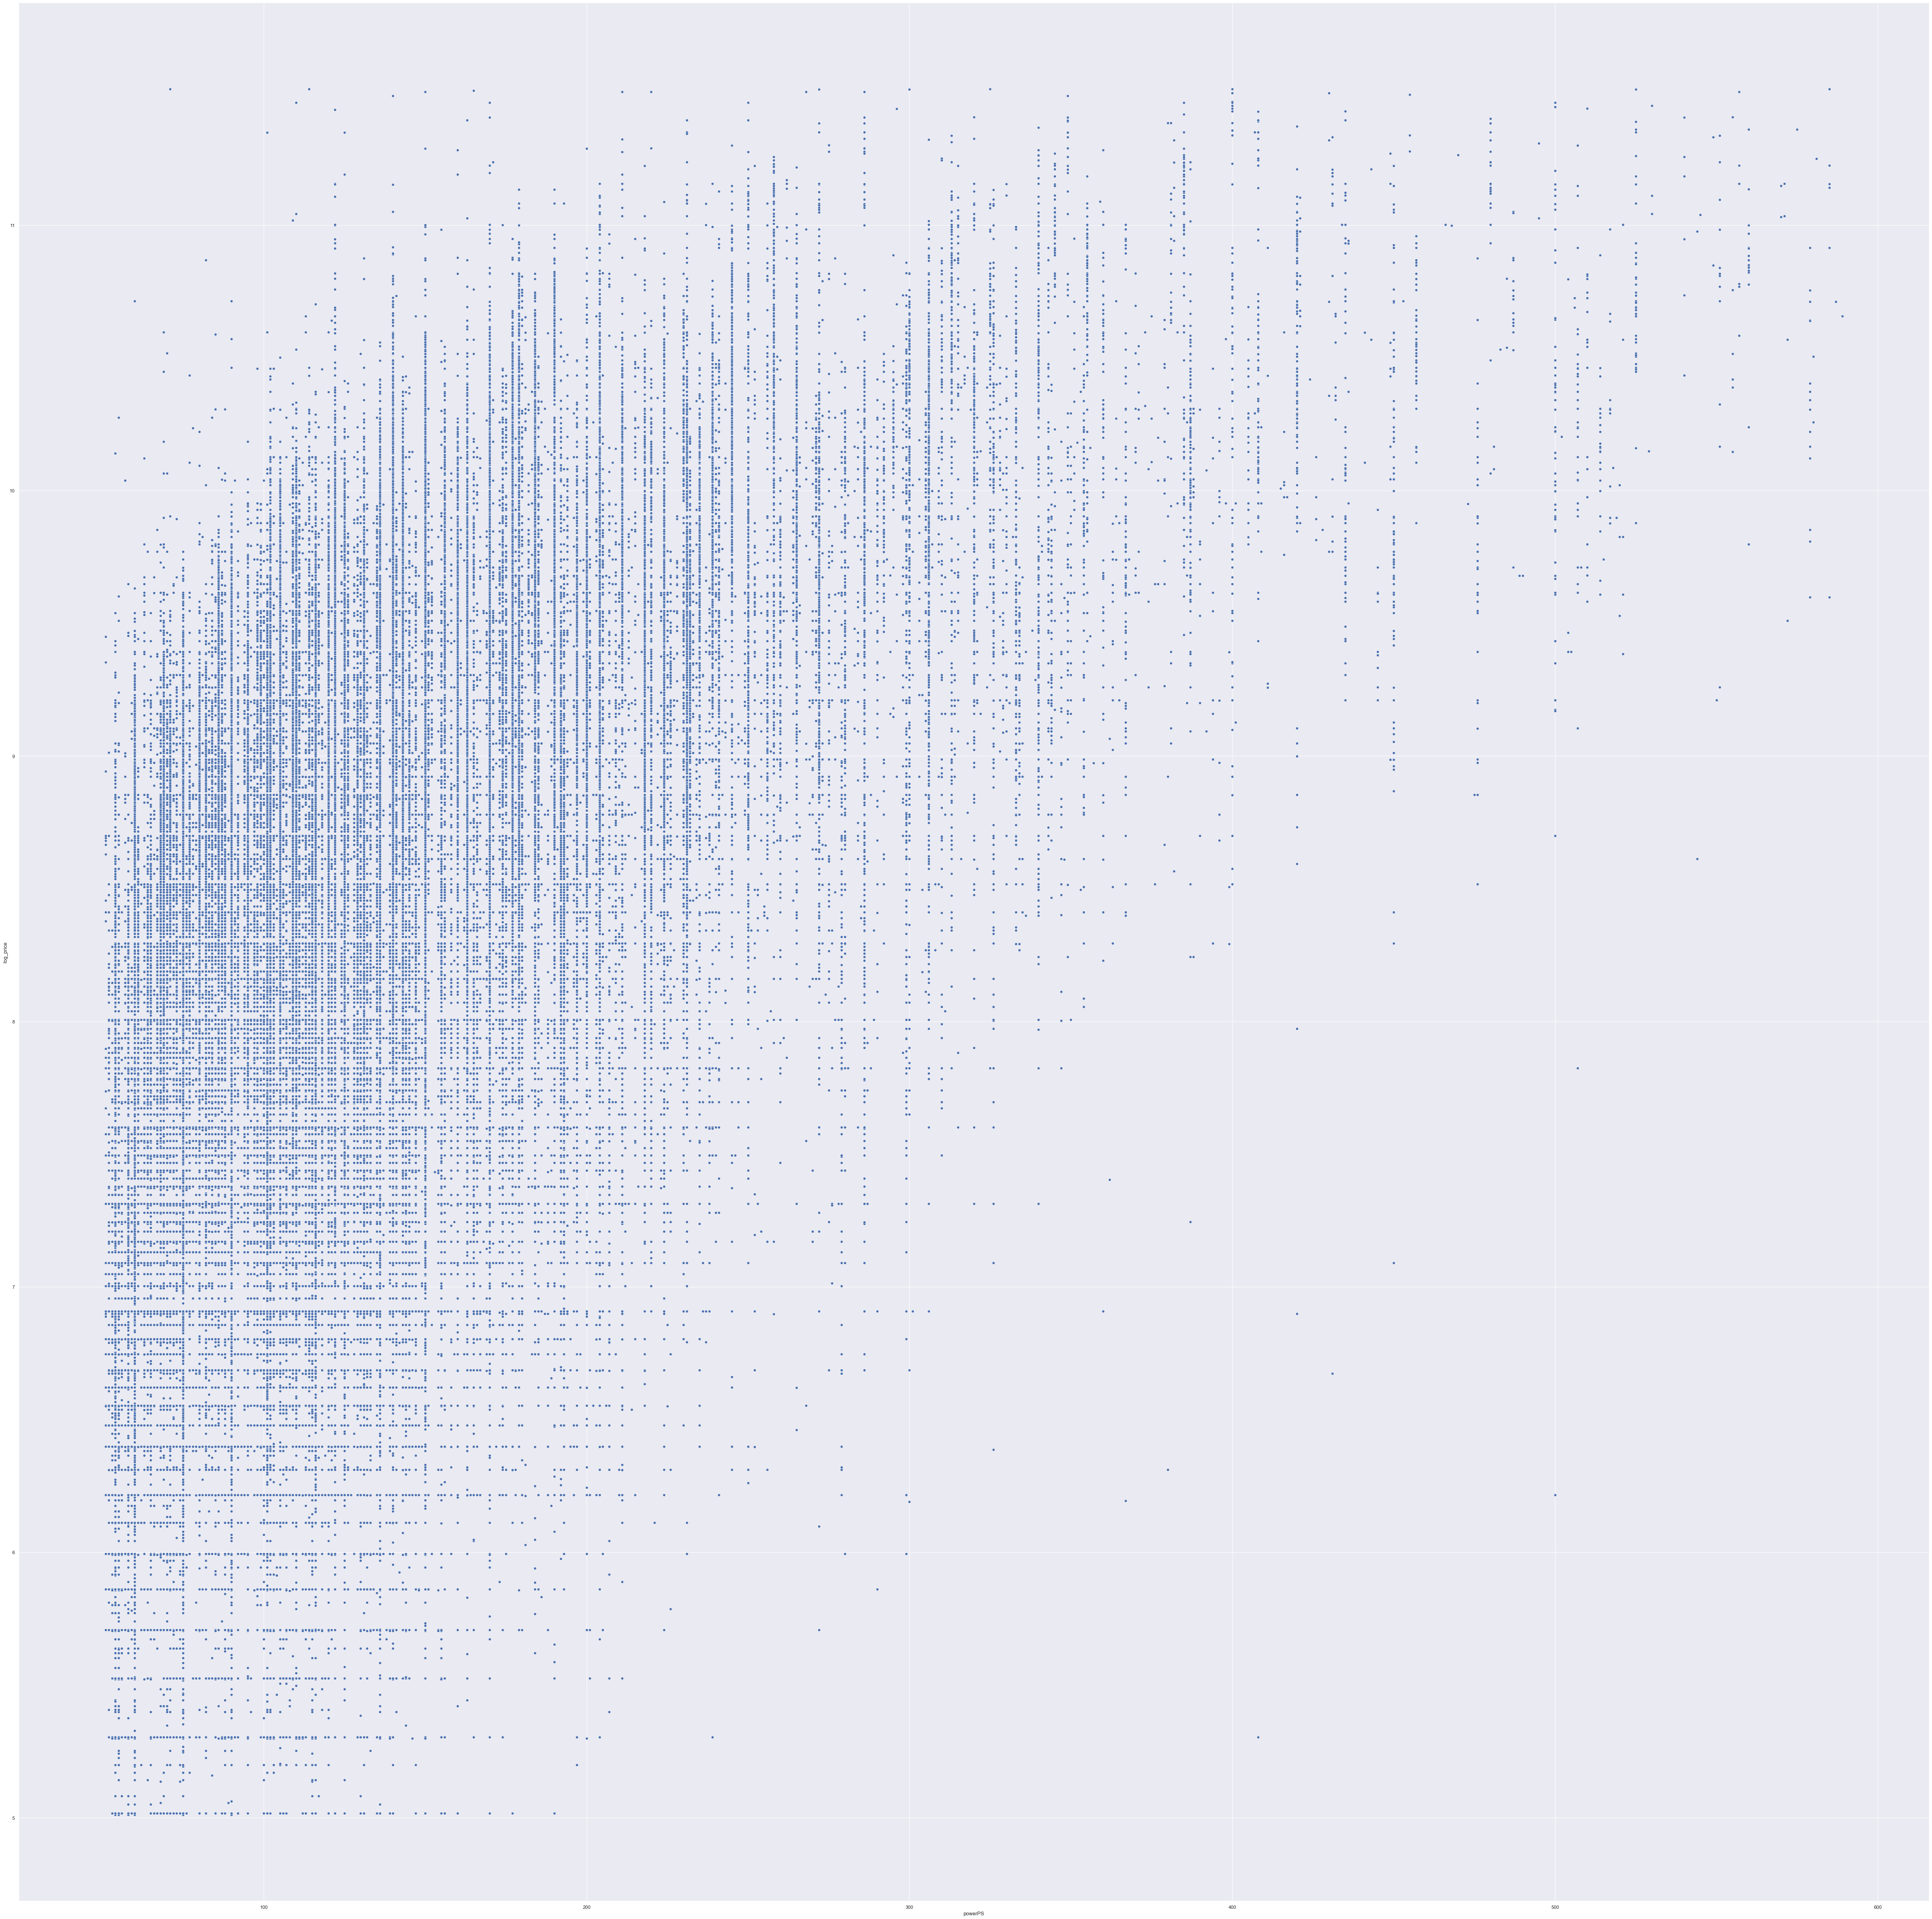

In [14]:
# график зависимости целевой переменной от значения мощности в лошадиных силах
plt.figure(figsize=(80, 80))
sns.scatterplot(data, x="powerPS", y='log_price')
data.powerPS.corr(data.log_price)
# признак неплохо коррелирует с целевой переменной
### с ростом мощности минимальная цена скорее не упадёт. Можно сказать, что цена "монотонна" с ростом мощности

<AxesSubplot: xlabel='kilometer', ylabel='Count'>

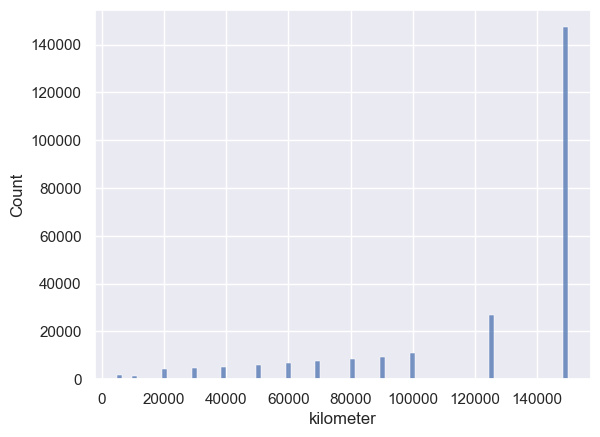

In [15]:
# распределение значений пробега

sns.histplot(data.kilometer)
# большая часть значений (больше половины) равна 150_000

<AxesSubplot: >

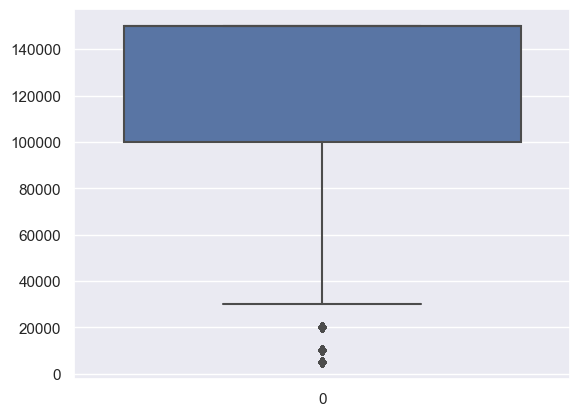

In [16]:
sns.boxplot(data.kilometer)
# значения < ~35000 являются выбросами

-0.45304432123449717

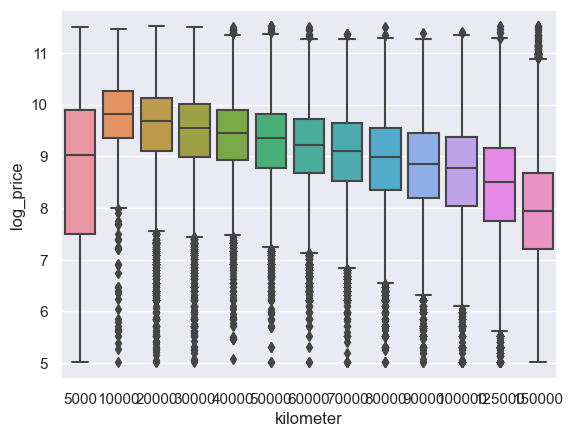

In [17]:
# график зависимости целевой переменной от пробега

sns.boxplot(data, x="kilometer", y='log_price')
data.kilometer.corr(data.log_price)
# заметна некоторая отрицательная корреляция
# почти при каждом значении признака есть "равномерно" распределённые выбросы, в основном в меньшую сторону

<AxesSubplot: xlabel='autoAgeMonths', ylabel='Count'>

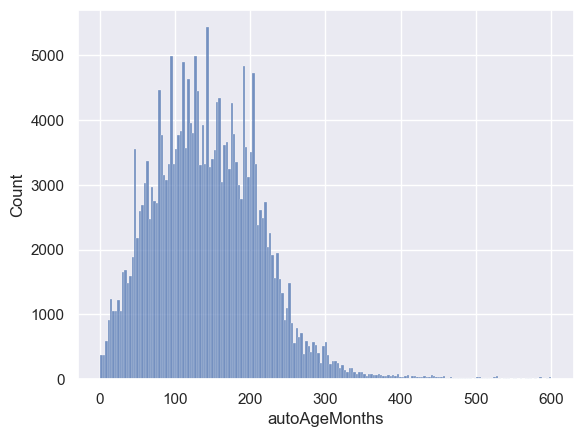

In [18]:
# распределение значений "возраста" машины

sns.histplot(data.autoAgeMonths)
# похоже на нормальное распределение

<AxesSubplot: >

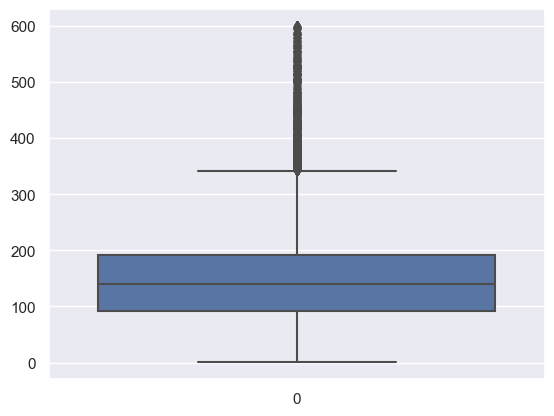

In [19]:
sns.boxplot(data.autoAgeMonths)
# большая часть значений лежит в интервале [0, ~340];
# аномально маленьких значений нет;
# много аномально больших значений;
# выбросы плотно распределены

-0.6420600960272136

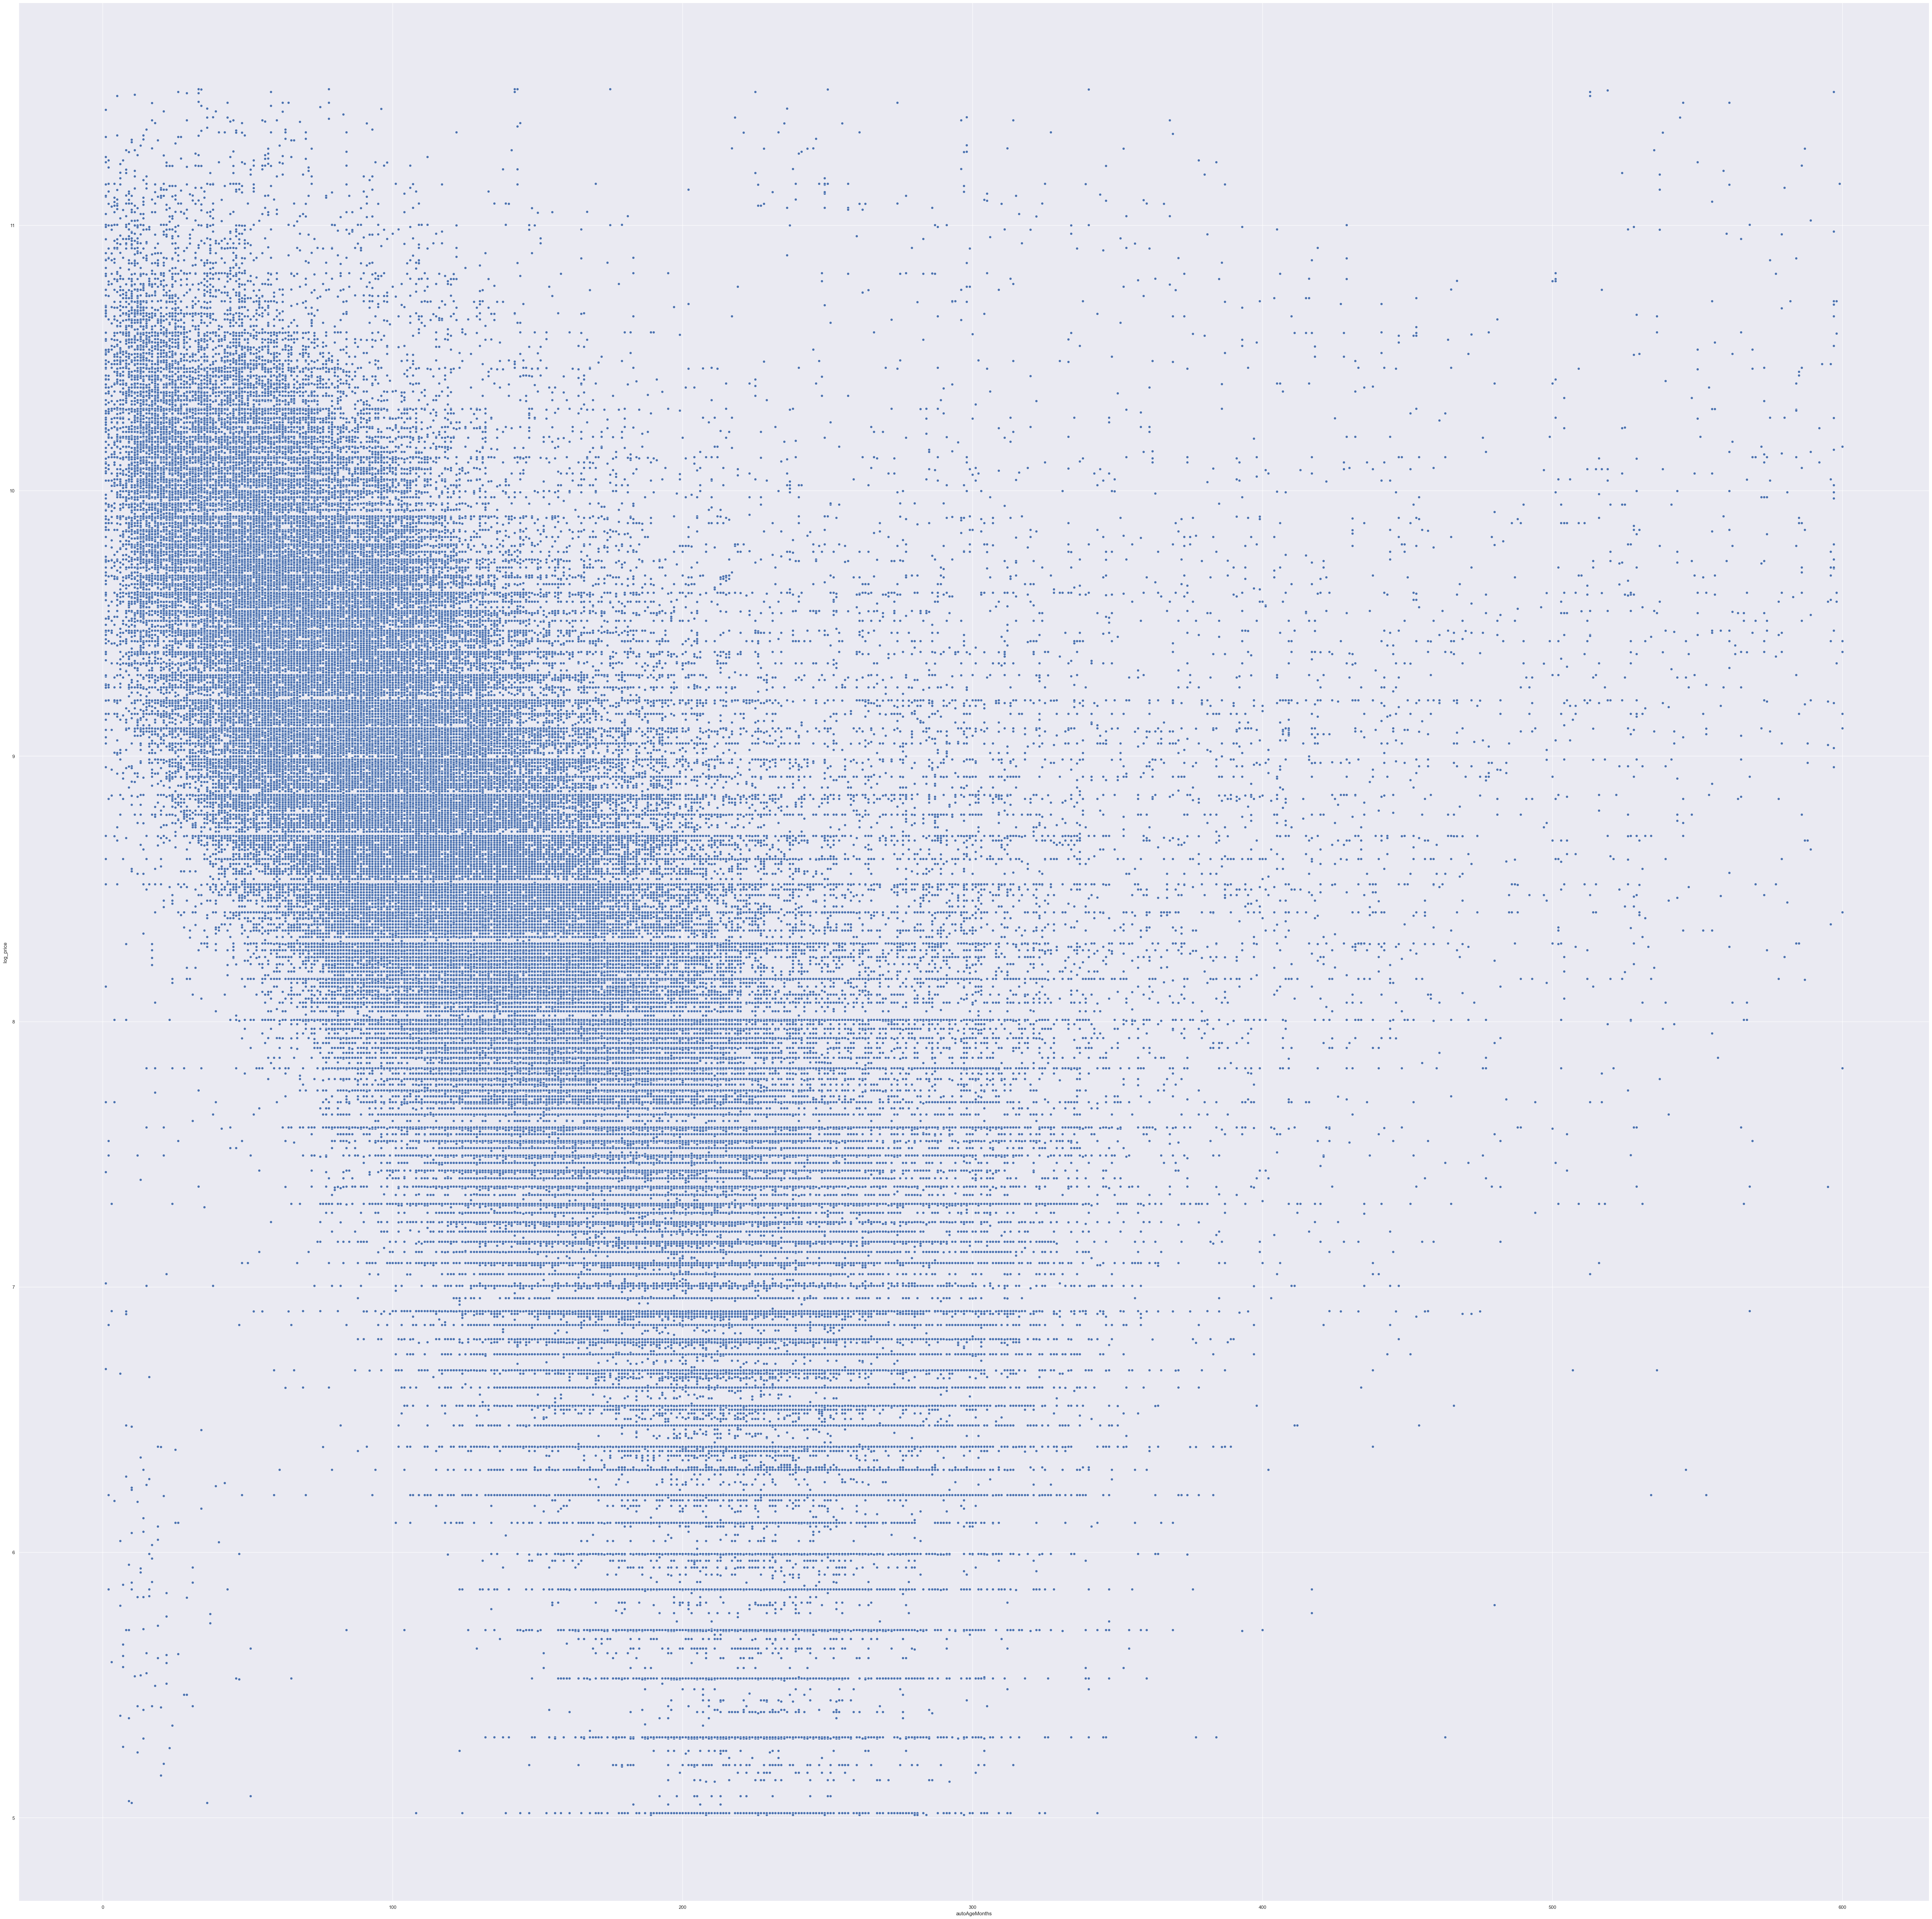

In [20]:
# график зависимости целевой переменной от "возраста" машины

plt.figure(figsize=(80, 80))
sns.scatterplot(data, x="autoAgeMonths", y='log_price')
data.autoAgeMonths.corr(data.log_price)
# сначала корреляция заметно отрицательная, затем разброс увиличивается в сторону положительной корреляции
### почему так?

<AxesSubplot: >

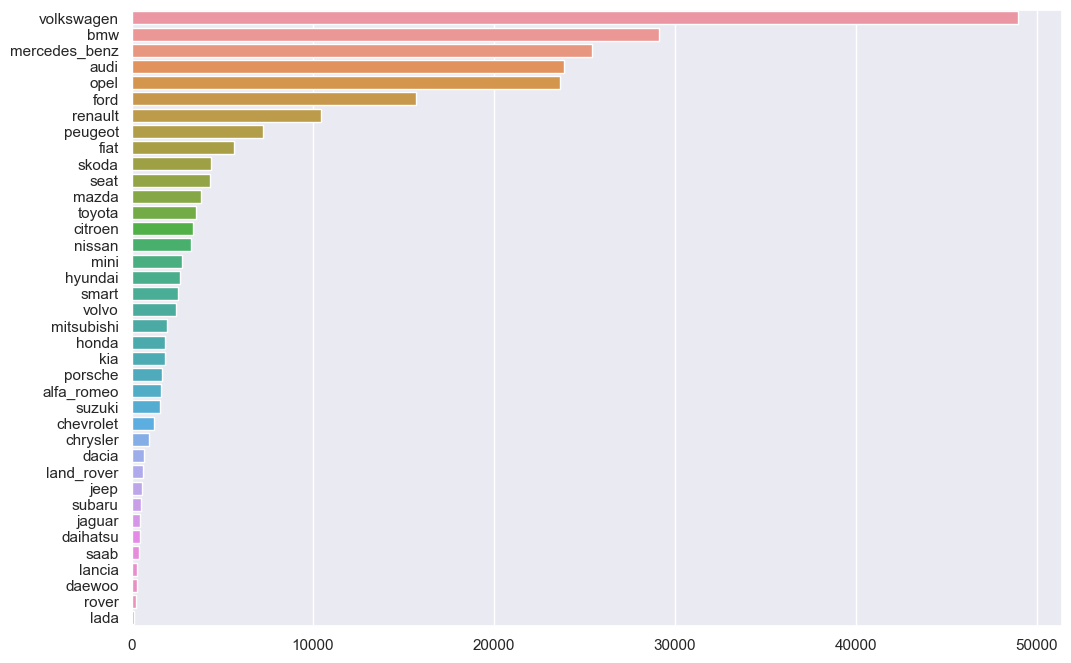

In [21]:
# распределение машин по марке

plt.figure(figsize=(12, 8))
sns.barplot((pd.DataFrame(data.brand.value_counts()).transpose()), orient='h')

In [15]:
# всего марок
data.brand.unique().size

38

In [22]:
# выберем те марки, которые входят в 95% выборки по количеству машин

int(95/100 * data.brand.value_counts().sum()) # 228390
data.brand.value_counts()[:22].sum() # 228809

228809

<AxesSubplot: xlabel='log_price', ylabel='brand'>

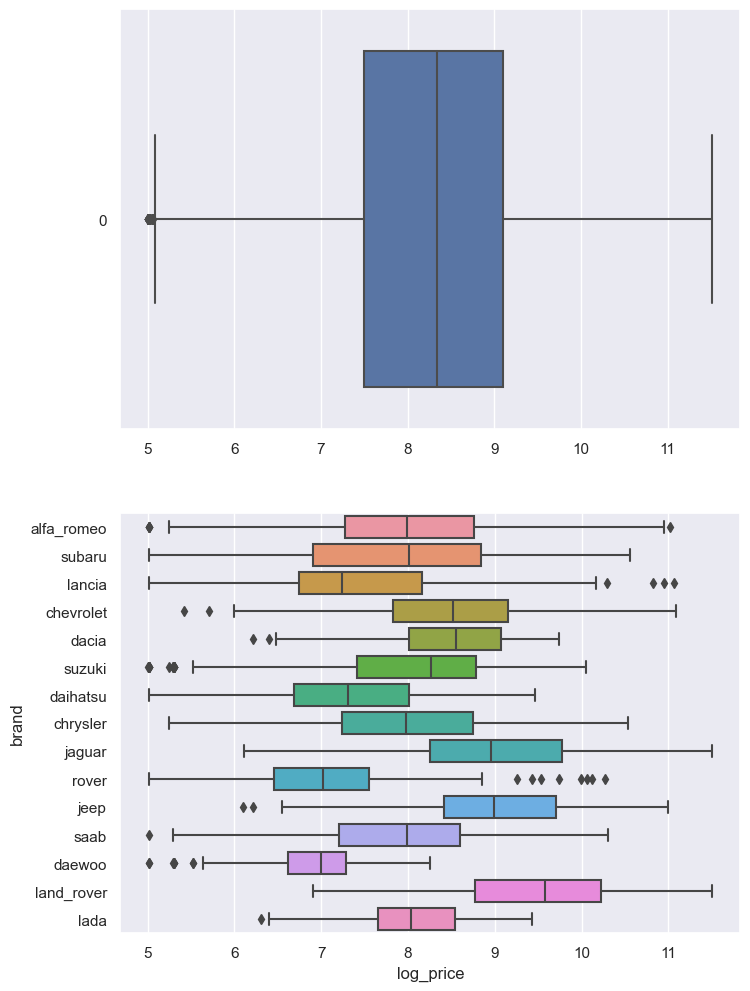

In [23]:
plt.figure(figsize=(8, 12))
plt.subplot(2, 1, 1)
sns.boxplot(data.log_price, orient='h')
plt.subplot(2, 1, 2)
sns.boxplot(data[data.brand.isin(data.brand.value_counts()[23:].index)], y="brand", x='log_price', orient="h")

<AxesSubplot: xlabel='log_price', ylabel='brand'>

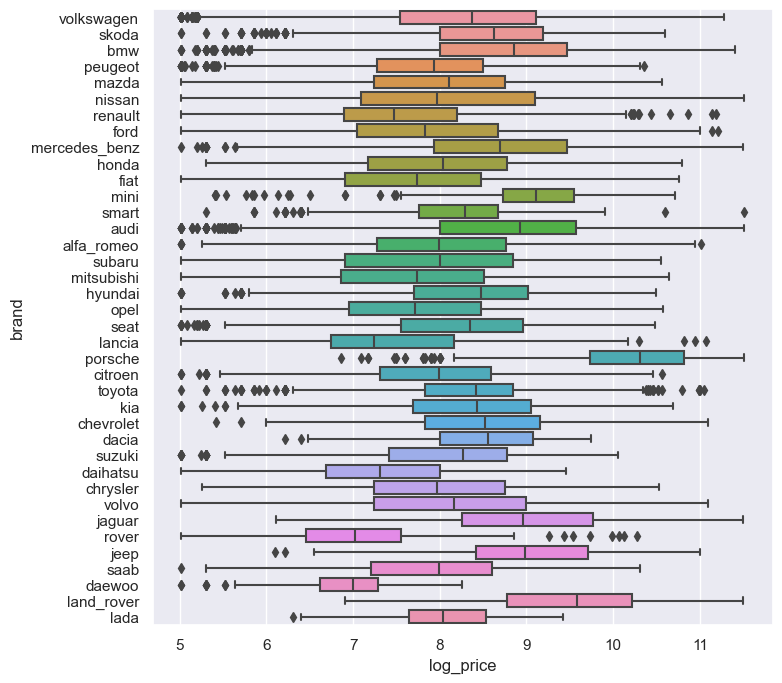

In [24]:
# график распределения целевой переменной в зависимости от марки машины

plt.figure(figsize=(8, 8))
sns.boxplot(data, y="brand", x='log_price', orient="h")
# выделяющихся значений признака нет, но распределения визуально различны

<AxesSubplot: >

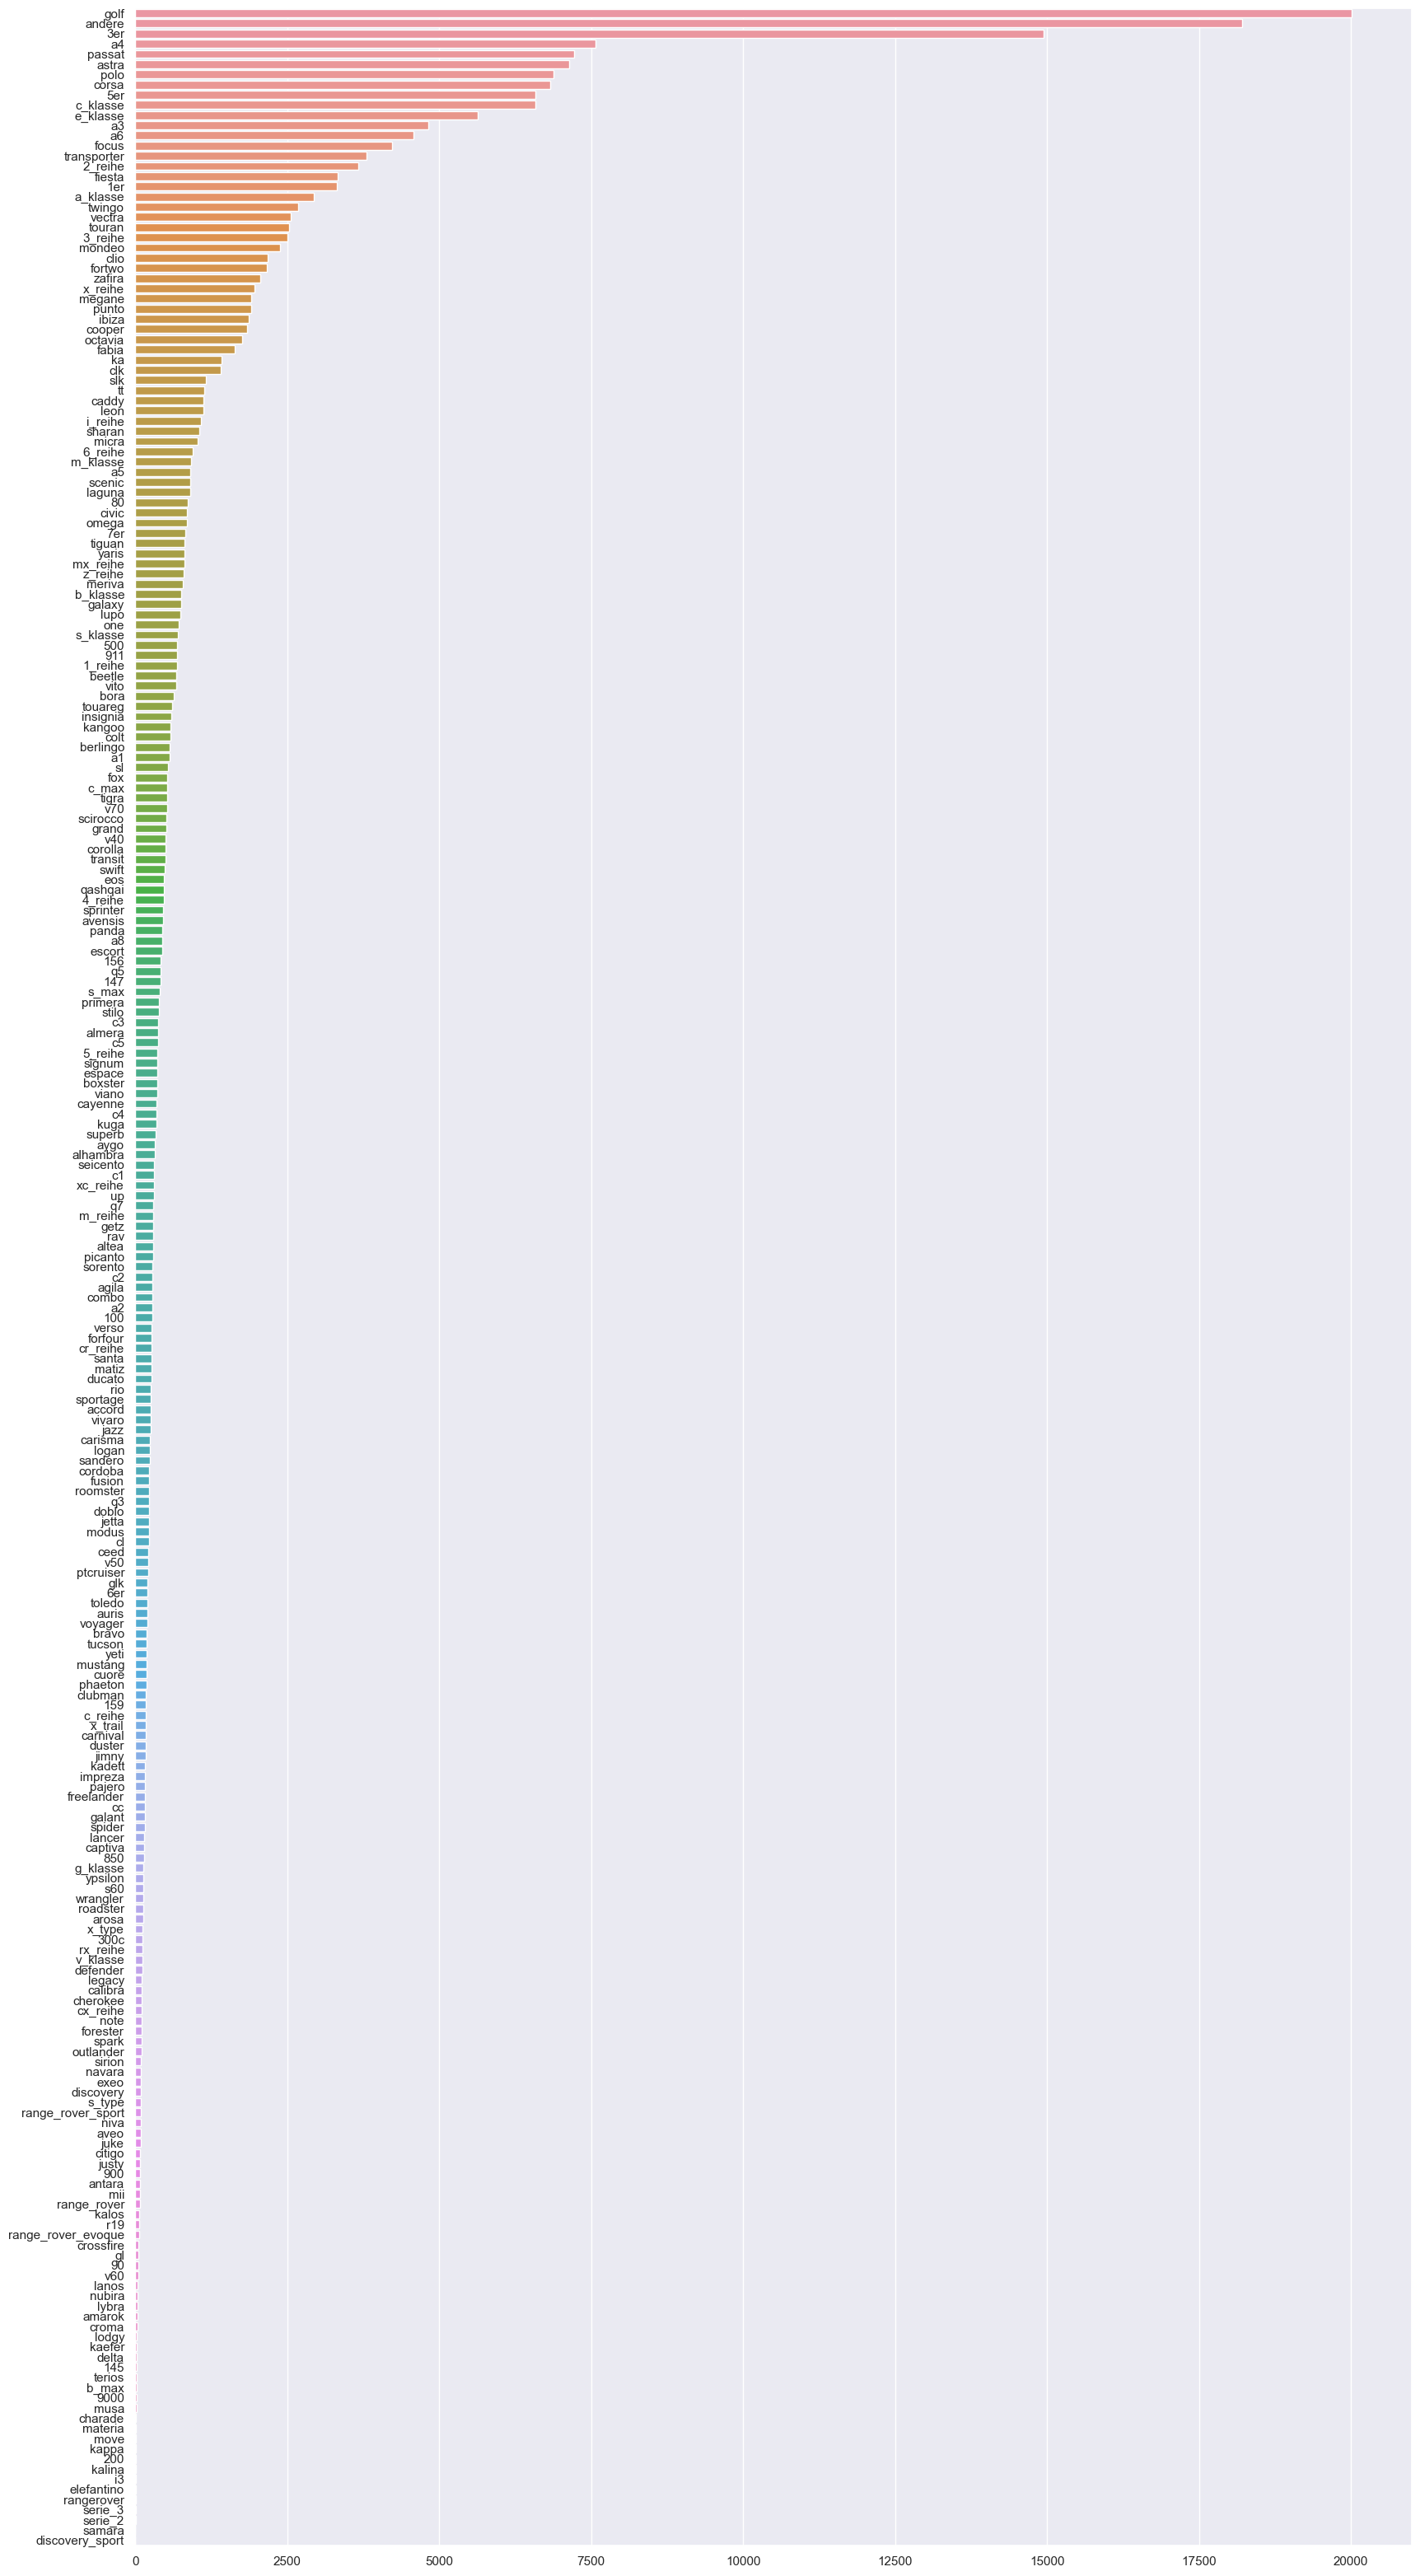

In [25]:
# распределение машин по модели

plt.figure(figsize=(20, 40))
sns.barplot((pd.DataFrame(data.model.value_counts()).transpose()), orient='h')

<AxesSubplot: xlabel='log_price', ylabel='model'>

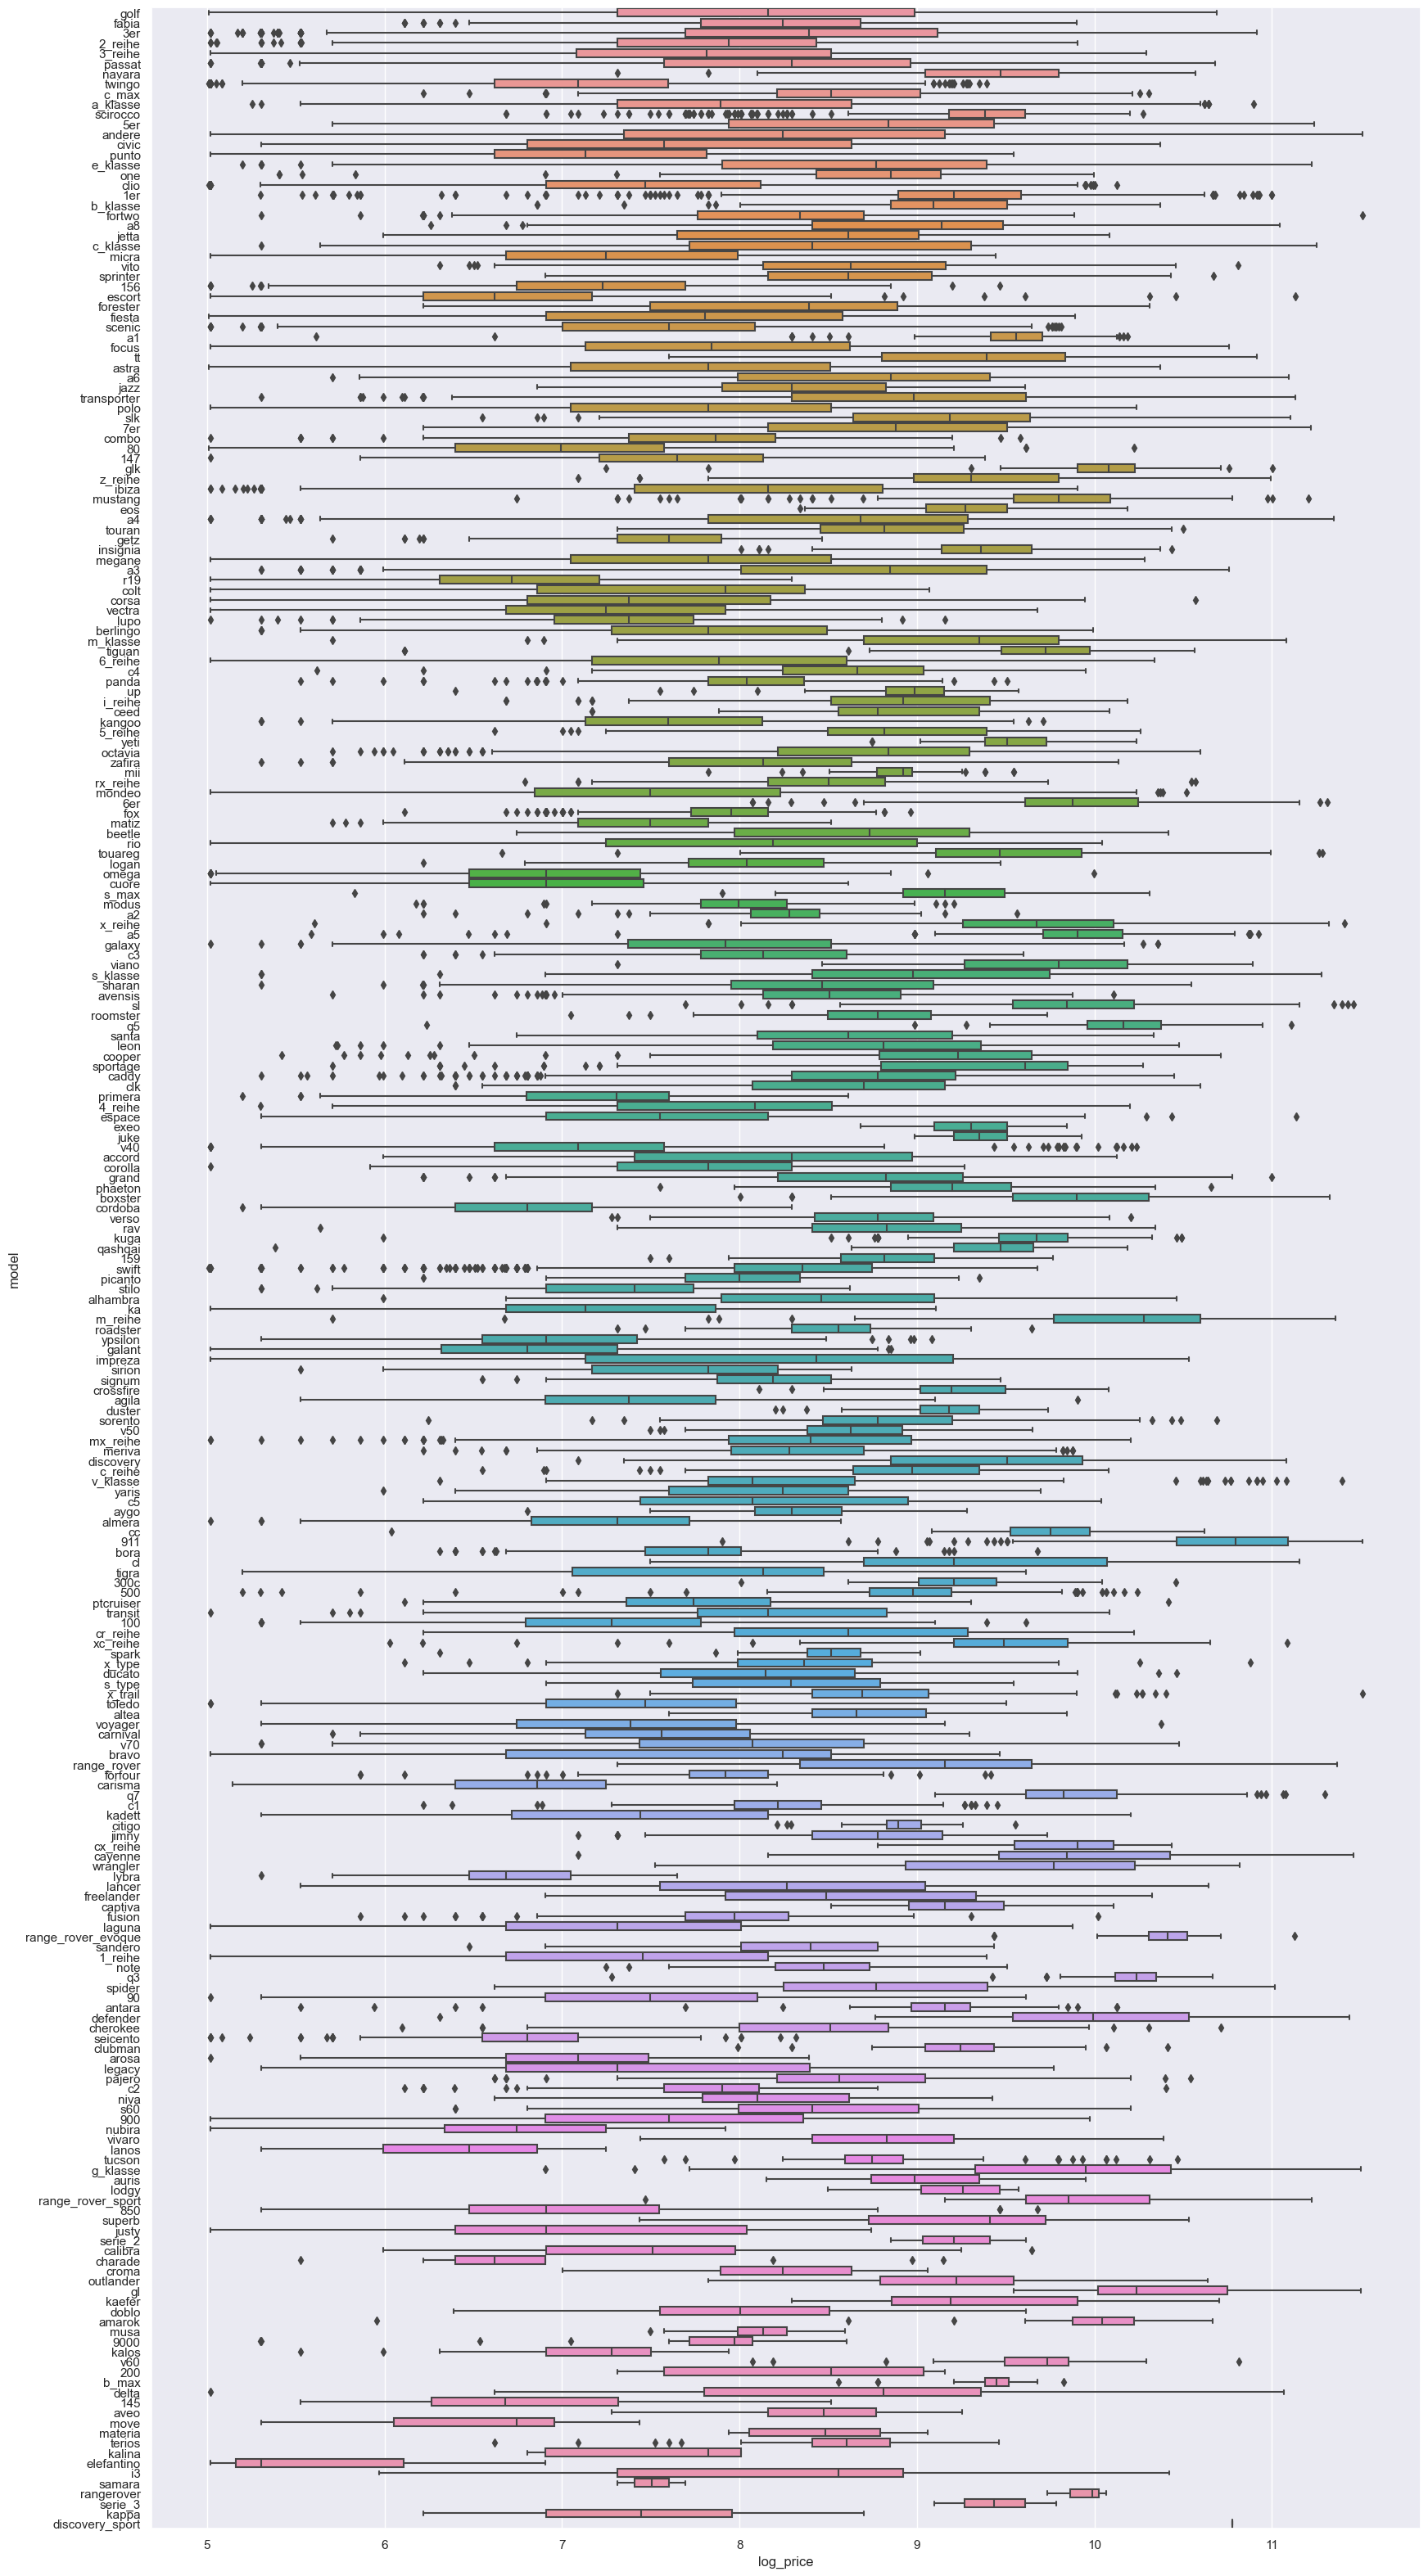

In [26]:
# распределение целевой переменной в зависимости от модели машины

plt.figure(figsize=(20, 40))
sns.boxplot(data, y="model", x='log_price', orient="h")
# тенденции в зависимости целевой переменной от признака нет, но распределения сильно различаются

<AxesSubplot: xlabel='log_price', ylabel='vehicleType'>

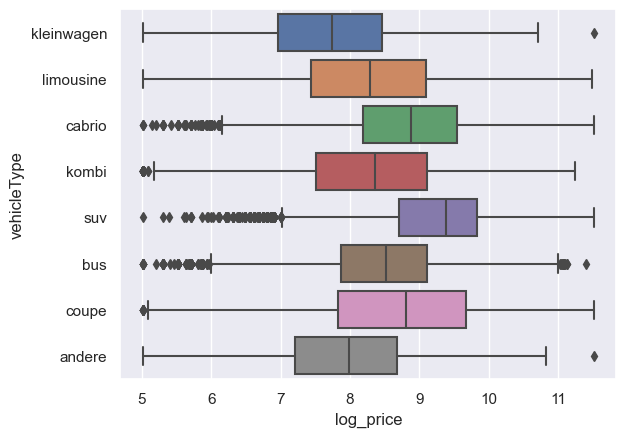

In [27]:
# распределение целевой переменной в зависимости от типа транспортного средства

sns.boxplot(data, y="vehicleType", x='log_price', orient="h")
# между различными значениями признака есть значащие отличия

<AxesSubplot: xlabel='log_price', ylabel='gearbox'>

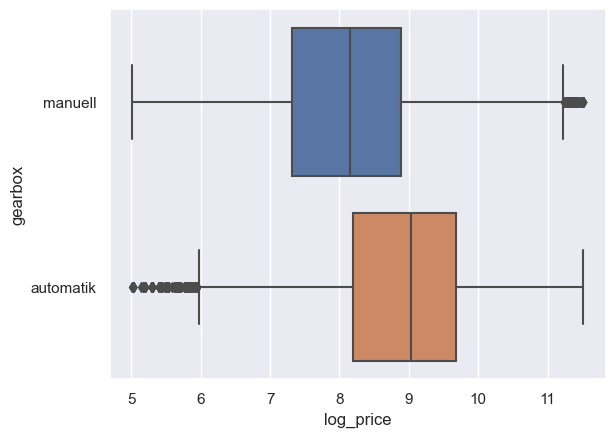

In [28]:
# распределение целевой переменной в зависимости от типа трансмиссии

sns.boxplot(data, y="gearbox", x='log_price', orient="h")
# есть различия

<AxesSubplot: xlabel='log_price', ylabel='fuelType'>

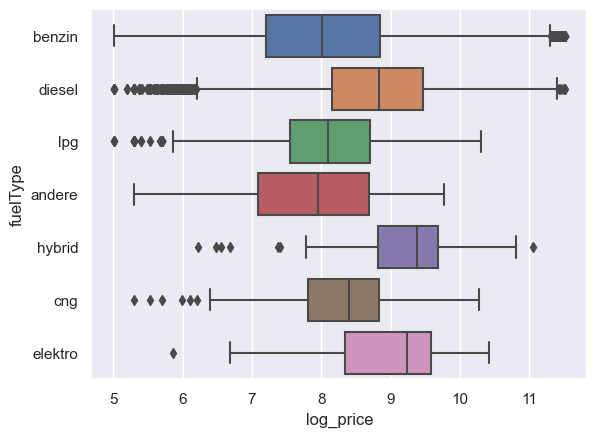

In [29]:
# распределение целевой переменной в зависимости от вида топлива, который испольщует автомобиль

sns.boxplot(data, y="fuelType", x='log_price', orient="h")

<AxesSubplot: xlabel='log_price', ylabel='notRepairedDamage'>

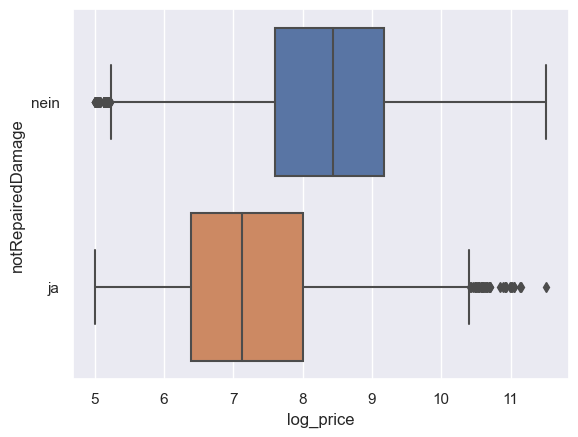

In [30]:
# распределение целевой переменной в зависимости от исправности

sns.boxplot(data, y="notRepairedDamage", x='log_price', orient="h")
# заметна зависимость

* Подумайте, какие признаки могут быть полезными на основе этих графиков, обработайте выбросы.

На первый взгляд все переменные могут быть полезными. Числовые переменные хорошо коррелируют с целевой переменной, а в зависимости от значений категориальных признаков переменная имеет различающиеся распределения

* Подумайте, какие трансформации признаков из известных вам будет уместно применить.

In [5]:
# значение ошибки при константном предсказании

from sklearn.metrics import mean_squared_error
const = data.log_price.mean()
print(f'best const = {const}',
      'train mse with best const: %.4f' % mean_squared_error(data.log_price,
                                                             const * np.ones(data.log_price.shape), squared=False),
      sep='\n')

best const = 8.282658715222176
train mse with best const: 1.1117


* Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.

* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [6]:
data['bias'] = 1
data_train = data.sample(frac=0.8, random_state=48)
data_test = data[~data.index.isin(data_train.index)].sample(frac=0.5, random_state=48)
data_val = data[(~data.index.isin(data_train.index)) & (~data.index.isin(data_test.index))]

In [7]:
x_train = data_train.drop('log_price', axis=1)
y_train = data_train.log_price

x_test = data_test.drop('log_price', axis=1)
y_test = data_test.log_price

x_val = data_val.drop('log_price', axis=1)
y_val = data_val.log_price

Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

возможные изменения в признаках

* `brand` - разделить все бренды на несколько групп (по популярности / люксовости)
* `model` - разделить все модели на несколько групп (по популярности / люксовости)
* `vehicleType` - разбить на группы по габаритам
* `gearbox` - оставить как есть
* `fuelType` - разделить на несколько групп (электричество, горючая смесь...)
* `notRepairedDamage` - оставить как есть
* `powerPS` - разделить на несколько групп (по популярности / люксовости)
* `kilometer` - сделать категориальным признаком и разделить на несколько групп
* `autoAgeMonths` - добавить признак отличающий две тенденции зависимости признака от целевой переменной. Почему с какого-то момента корреляция становится положительной?

In [8]:
# добавим новое значение марки машин - andere(другое)
# для всех объектов, марка которых входит в последние 5% по популярности установим новое значение марки равное andere

data.loc[data[data.brand.isin(data.brand.value_counts()[22:].index)].index, 'brand'] = 'andere'

In [9]:
# аналогично моделям оставим 100 первых популярных моделей машин:

data.loc[data[data.model.isin(data.model.value_counts()[101:].index)].index, 'model'] = 'andere'

In [10]:
categorical = ['brand', 'model', 'vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage']
numeric = ['powerPS', 'kilometer', 'autoAgeMonths']
other = ['bias']

# YOUR CODE (EDA):

In [11]:
data['bias'] = 1
# other += ['bias']

x = data[categorical + numeric + other]
y = data['log_price']

In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

# x = column_transformer.fit_transform(x)

In [13]:
from linear_regression import LinearRegression

In [32]:
# from sklearn.model_selection import train_test_split
#
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.preprocessing import StandardScaler
#
# temp_data = data.copy()
#
# temp_data['bias'] = 1
#
# cat_x = temp_data[categorical + numeric + other]
# cat_y = temp_data['log_price']
#
# categorical_column_transformer = ColumnTransformer([
#     ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
#     ('scaling', StandardScaler(), numeric),
#     ('other',  'passthrough', other)
# ])
#
# X_train, X_test, y_train, y_test = train_test_split(cat_x, cat_y, test_size=0.3, random_state=10)
#
# X_train = categorical_column_transformer.fit_transform(X_train)
#
# X_train = X_train.toarray()
# X_test = categorical_column_transformer.transform(X_test).toarray()
# y_train = y_train.values
# y_test = y_test.values
#
# categorical_descent_config = {
#     'descent_name': 'adam',
#     'kwargs': {
#         'dimension': X_train.shape[1],
#         'lambda_': 0.4
#     }
# }
#
# categorical_reg = LinearRegression(categorical_descent_config, max_iter=3000, tolerance=1e-8)
# model = categorical_reg.fit(X_train, y_train)
# y_pred = model.predict(X_test)
# print("Test RMSE = %.4f" % mean_squared_error(y_train, model.predict(X_train), squared=False))
# print("Test RMSE = %.4f" % mean_squared_error(y_test, y_pred, squared=False))
#
# np.linalg.norm(X_train.dot(model.descent.w) - y_train)
# model.loss_history.__len__()
# model.descent.w
# model.tolerance
# y_train
# model.predict(X_train)

## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [14]:
from sklearn.metrics import r2_score

In [15]:
x_val_transform = column_transformer.fit_transform(x_val).toarray()
x_train_transform = column_transformer.transform(x_train).toarray()
x_test_transform = column_transformer.transform(x_test).toarray()

y_val = y_val.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [16]:
lambda_score = {'method': [],
                'lambda': [],
                'val_loss': [],
                'train_loss': [],
                'test_loss': [],
                'val_R^2': [],
                'train_R^2': [],
                'test_R^2': [],
                'iterations': []}
lambdas = np.logspace(-3, 1, 50)
methods = ('full', 'stochastic', 'momentum', 'adam')

for method in methods:
    for lam in lambdas:
        lambda_score['method'].append(method)
        lambda_score['lambda'].append(lam)

        regression_config = {
            'descent_name': method,
            'kwargs': {'dimension': x_val_transform.shape[1], 'lambda_': lam}
        }

        reg = LinearRegression(regression_config)
        model = reg.fit(x_val_transform, y_val)

        # print(model.descent.w)

        lambda_score['val_loss'].append(mean_squared_error(y_val, model.predict(x_val_transform), squared=False))
        lambda_score['train_loss'].append(mean_squared_error(y_train, model.predict(x_train_transform), squared=False))
        lambda_score['test_loss'].append(mean_squared_error(y_test, model.predict(x_test_transform), squared=False))

        lambda_score['val_R^2'].append(r2_score(y_val, model.predict(x_val_transform)))
        lambda_score['train_R^2'].append(r2_score(y_train, model.predict(x_train_transform)))
        lambda_score['test_R^2'].append(r2_score(y_test, model.predict(x_test_transform)))

        lambda_score['iterations'].append(len(model.loss_history))

C:\Users\andre\PycharmProjects\hw3\venv\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\andre\PycharmProjects\hw3\venv\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\andre\PycharmProjects\hw3\venv\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\andre\PycharmProjects\hw3\venv\lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\andre\PycharmProjects\hw3\venv\lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\andre\PycharmP

In [17]:
pd.DataFrame(lambda_score)

method     lambda  val_loss  train_loss  test_loss    val_R^2  train_R^2  \
0     full   0.001000  4.741967    4.751739   4.752190 -16.232730 -15.959980   
1     full   0.001207  3.939615    3.947114   3.955641 -10.894455 -10.702526   
2     full   0.001456  4.596759    4.608123   4.610764 -15.193489 -14.950284   
3     full   0.001758  4.663218    4.664187   4.672108 -15.665120 -15.340760   
4     full   0.002121  5.878658    5.890826   5.903276 -25.484591 -25.065897   
..     ...        ...       ...         ...        ...        ...        ...   
195   adam   4.714866  0.553030    0.577632   0.587546   0.765612   0.749376   
196   adam   5.689866  0.552894    0.577780   0.587487   0.765728   0.749248   
197   adam   6.866488  0.553088    0.577444   0.587251   0.765563   0.749539   
198   adam   8.286428  0.552932    0.577811   0.587556   0.765696   0.749220   
199   adam  10.000000  0.553159    0.577650   0.587280   0.765503   0.749361   

      test_R^2  iterations  
0   -15.899518           3  
1   -10.709020           3  
2   -14.908622           6  
3   -15.334752           9  
4   -25.077920          19  
..         ...         ...  
195   0.741672         272  
196   0.741724         253  
197   0.741932         222  
198   0.741664         254  
199   0.741907         213  

[200 rows x 9 columns]

In [16]:
best_lambdas = {'full': 1.526418,
                'stochastic': 0.596362,
                'momentum': 0.868511,
                'adam': 1.264855}

### Задание 5.2. Сравнение методов (1 балла) 

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

In [17]:
best_loss = dict()
for method in best_lambdas:
    regression_config = {
        'descent_name': method,
        'kwargs': {'dimension': x_val_transform.shape[1], 'lambda_': best_lambdas[method]}
    }

    reg = LinearRegression(regression_config)
    model = reg.fit(x_val_transform, y_val)
    loss = [model.loss_history[-1] for _ in range(301)]
    loss[:len(model.loss_history)] = model.loss_history
    best_loss[method] = loss
    print(len(model.loss_history))

64
301
120
153


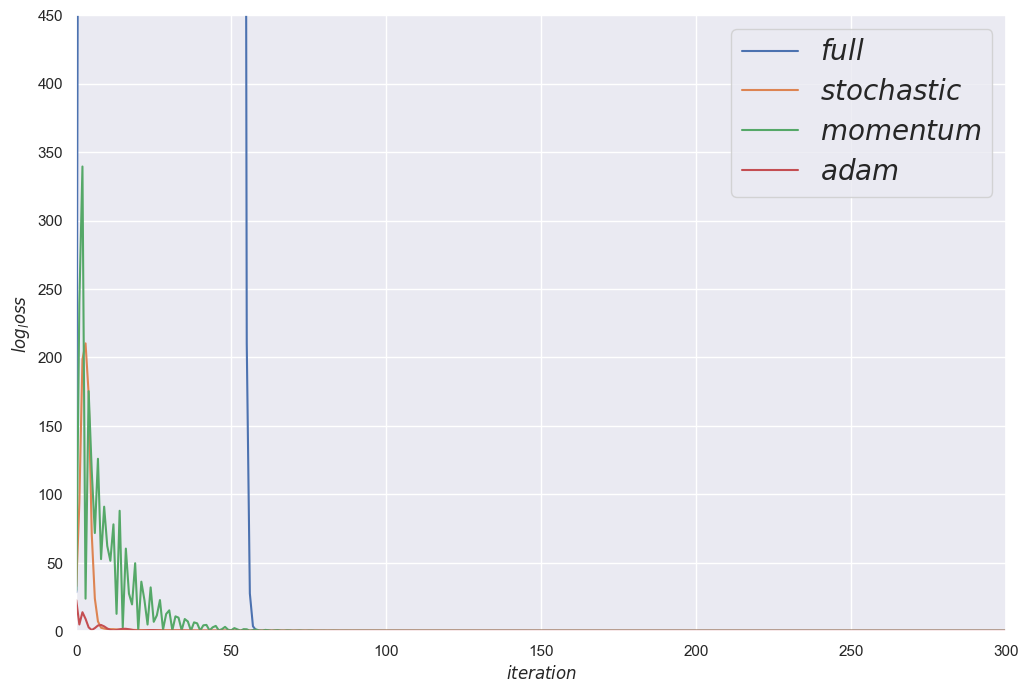

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.axis([0,300,0,450])
# plt.yscale('log')
plt.xlabel(r'$iteration$')
plt.ylabel(r'$log_loss$')
plt.plot(range(301), best_loss['full'], label=r'$full$')
plt.plot(range(301), best_loss['stochastic'], label=r'$stochastic$')
plt.plot(range(301), best_loss['momentum'], label=r'$momentum$')
plt.plot(range(301), best_loss['adam'], label=r'$adam$')
plt.legend(fontsize=20);

`### ваше решение тут ###`

## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска. 

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча.
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [17]:
from time import time

In [41]:
batch_sizes = np.arange(5, 500, 10)
k = 10

stochastic_size = {'batch_size': [],
                   'time': [],
                   'iterations': [],
                   'mse': []}

for size in batch_sizes:
    config = {'descent_name': 'stochastic',
              'kwargs': {'dimension': x_train_transform.shape[1],
                         'lambda_': 0.596362,
                         'batch_size': size}}
    curr_time = list()
    curr_iters = list()
    curr_mse = list()
    for i in range(k):
        reg = LinearRegression(config)
        start = time()
        model = reg.fit(x_train_transform, y_train)
        end = time()
        diff = end - start
        iters = len(model.loss_history)
        curr_time.append(diff)
        curr_iters.append(iters)
        curr_mse.append(float(np.sqrt(model.loss_history[-1])))
    stochastic_size['batch_size'].append(size)
    stochastic_size['time'].append(np.mean(curr_time))
    stochastic_size['iterations'].append(np.mean(curr_iters))
    stochastic_size['mse'].append(np.mean(curr_mse))
pd.DataFrame(stochastic_size)

   batch_size       time  iterations       mse
0           5  10.152786       293.4  0.866015
   batch_size       time  iterations       mse
0           5  10.152786       293.4  0.866015
1          15  10.521253       299.3  0.695449
   batch_size       time  iterations       mse
0           5  10.152786       293.4  0.866015
1          15  10.521253       299.3  0.695449
2          25  10.130411       301.0  0.662304
   batch_size       time  iterations       mse
0           5  10.152786       293.4  0.866015
1          15  10.521253       299.3  0.695449
2          25  10.130411       301.0  0.662304
3          35  10.216982       300.2  0.652381
   batch_size       time  iterations       mse
0           5  10.152786       293.4  0.866015
1          15  10.521253       299.3  0.695449
2          25  10.130411       301.0  0.662304
3          35  10.216982       300.2  0.652381
4          45  10.606813       298.1  0.647580
   batch_size       time  iterations       mse
0           5

batch_size       time  iterations       mse
0            5  10.152786       293.4  0.866015
1           15  10.521253       299.3  0.695449
2           25  10.130411       301.0  0.662304
3           35  10.216982       300.2  0.652381
4           45  10.606813       298.1  0.647580
5           55  10.088939       280.2  0.645587
6           65  10.267570       275.1  0.642960
7           75   8.399285       232.8  0.648046
8           85   8.045683       212.1  0.649563
9           95   6.899646       187.2  0.648323
10         105   7.209878       202.1  0.649719
11         115   6.377193       176.9  0.650895
12         125   6.735682       185.8  0.649465
13         135   5.985185       166.9  0.649048
14         145   5.612218       172.1  0.646670
15         155   5.519391       163.7  0.648177
16         165   5.425810       150.9  0.647286
17         175   5.416763       148.2  0.651665
18         185   5.154283       140.1  0.650855
19         195   5.384990       147.1  0.652678
20         205   4.634613       127.8  0.650461
21         215   4.849530       133.5  0.657193
22         225   4.279696       119.2  0.651021
23         235   4.712958       125.8  0.653098
24         245   4.522581       123.7  0.652685
25         255   4.440081       121.6  0.657660
26         265   3.894414       113.2  0.651430
27         275   4.177399       116.2  0.654562
28         285   4.199235       114.3  0.653552
29         295   3.813479       104.6  0.658023
30         305   3.926276       112.6  0.653532
31         315   3.882419       111.0  0.653026
32         325   3.353215        98.1  0.661451
33         335   3.403049        97.3  0.661628
34         345   3.505836       104.4  0.655043
35         355   3.430936        99.8  0.660829
36         365   3.738604       105.8  0.661727
37         375   3.300350        96.0  0.659090
38         385   3.257453        94.9  0.656714
39         395   2.960886        88.4  0.659420
40         405   2.843181        82.9  0.662412
41         415   3.367549        95.4  0.653347
42         425   3.179769        90.4  0.661032
43         435   2.844791        81.5  0.661899
44         445   3.390307        95.2  0.659299
45         455   3.081680        87.5  0.661522
46         465   3.113647        87.8  0.654506
47         475   2.928871        82.0  0.661297
48         485   3.340291        90.5  0.655692
49         495   2.973402        80.8  0.661511

In [56]:
df_stochastic_size = pd.DataFrame(stochastic_size)

In [23]:
import matplotlib.ticker as ticker

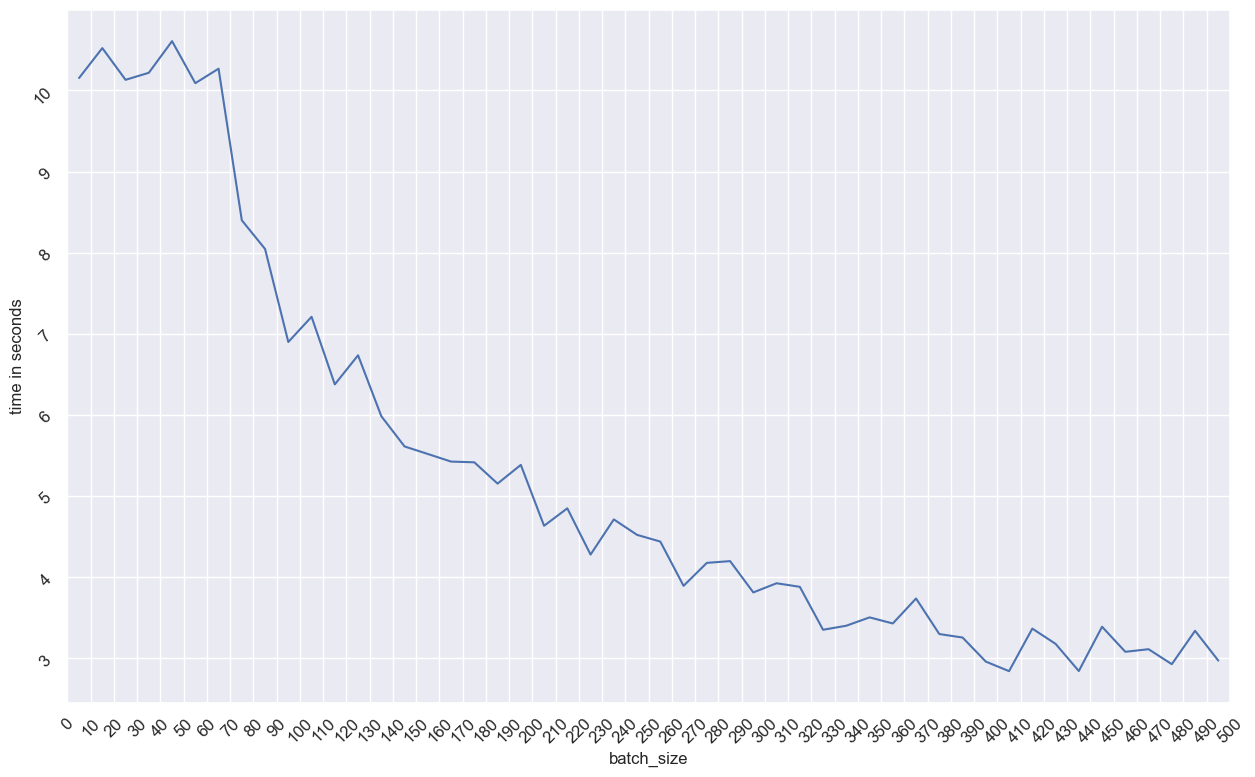

In [88]:
# зависимость времени обучения от размера батча

fig = plt.figure(figsize=(15, 9))
ax = fig.add_subplot(111)
ax.set_xlim([0, 500])
ax.set_xlabel('batch_size')
ax.set_ylabel('time in seconds')
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.tick_params(labelrotation=45,
               labelsize=12)
ax.plot(df_stochastic_size.batch_size, df_stochastic_size.time)
plt.show();
# 405 435 475 - самые оптимальные знаяения батча относительно времени

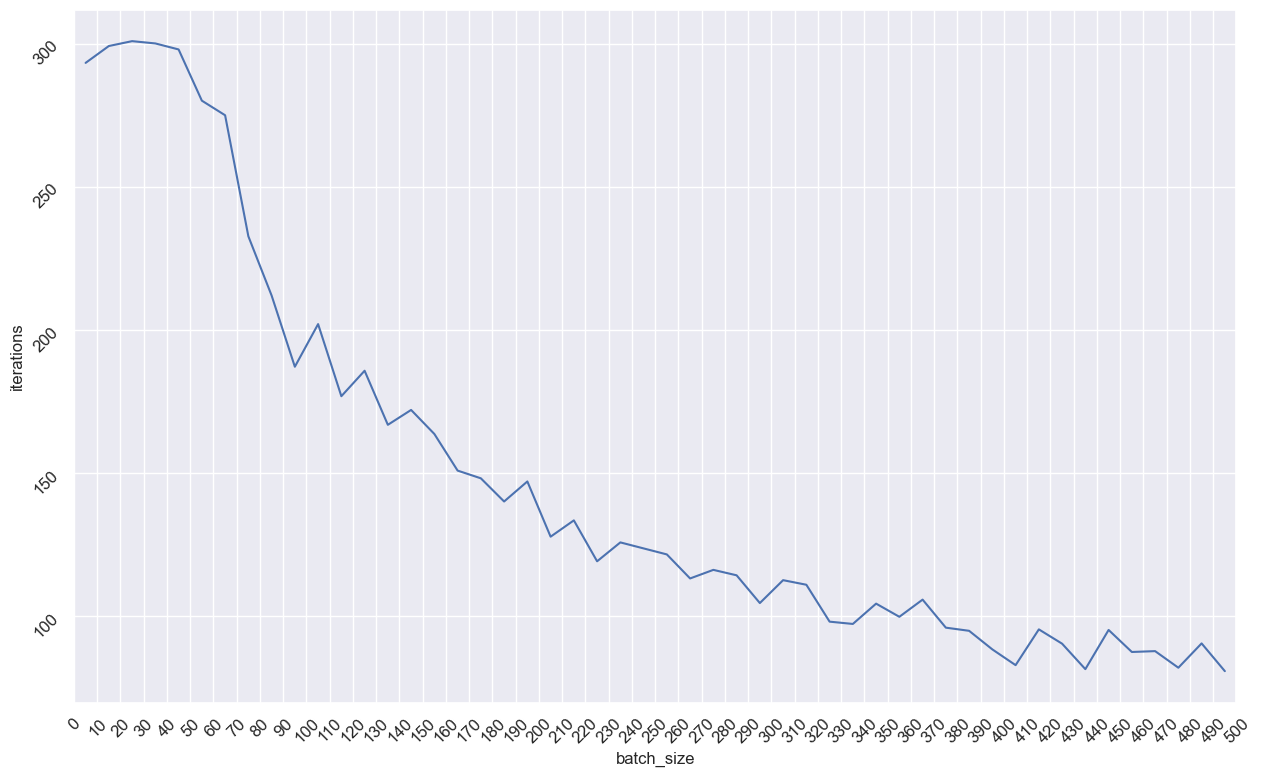

In [89]:
# зависимость количества итераций от размера батча

fig = plt.figure(figsize=(15, 9))
ax = fig.add_subplot(111)
ax.set_xlim([0, 500])
ax.set_xlabel('batch_size')
ax.set_ylabel('iterations')
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.tick_params(labelrotation=45,
               labelsize=12)
ax.plot(df_stochastic_size.batch_size, df_stochastic_size.iterations)
plt.show();
# 405 435 475 - самые оптимальные знаяения батча относительно кол-ва итераций

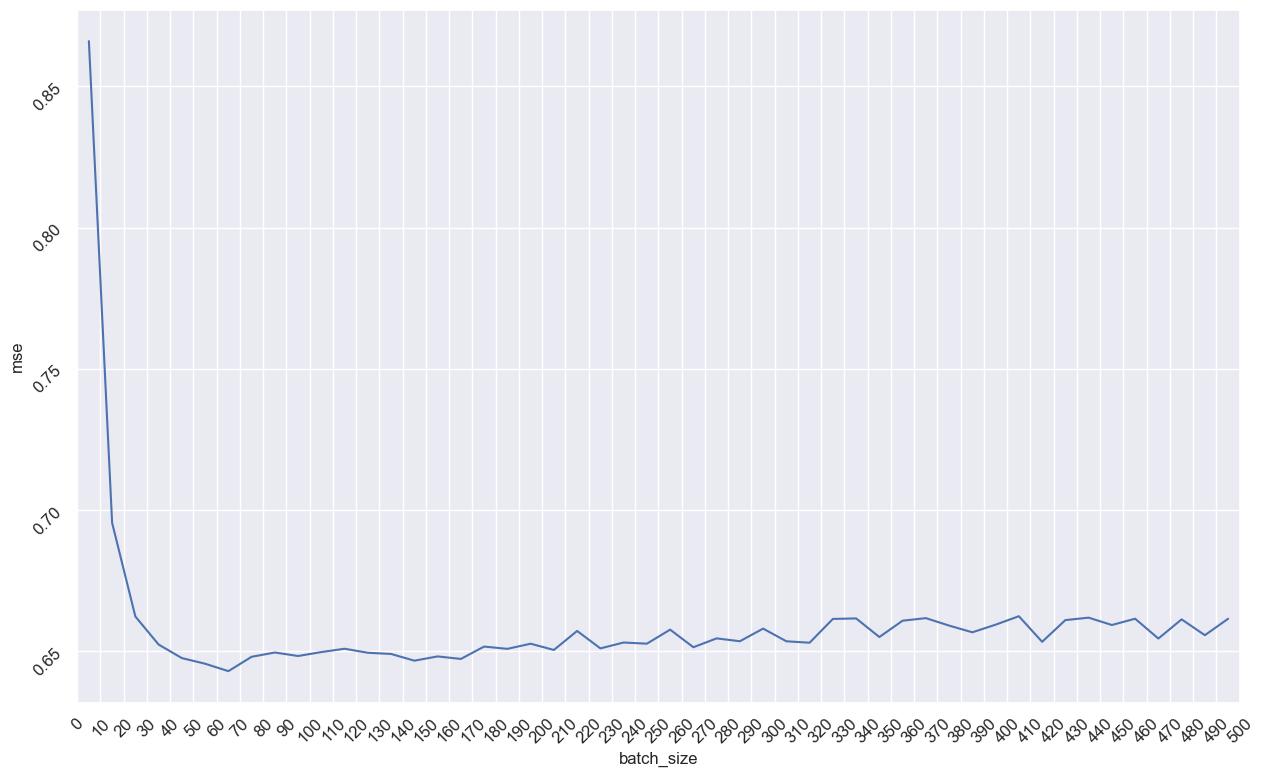

In [90]:
# зависимость ошибки от размера батча

fig = plt.figure(figsize=(15, 9))
ax = fig.add_subplot(111)
ax.set_xlim([0, 500])
ax.set_xlabel('batch_size')
ax.set_ylabel('mse')
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.tick_params(labelrotation=45,
               labelsize=12)
ax.plot(df_stochastic_size.batch_size, df_stochastic_size.mse)
plt.show();
# 65 415 465 485 - самые оптимальные знаяения батча относительно кол-ва итераций

In [ ]:
# "идеальный" вариант размера батча - 415

In [ ]:
# с увеличением размера батча и время и кол-во итераций "экспоненциально" убывает

`### ваше решение тут ###`

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.

Вставьте ссылку на успешную посылку:

* **BaseDescentReg**:

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 4 графика).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

In [19]:
mu_score = {'method': [],
            'mu': [],
            'val_loss': [],
            'train_loss': [],
            'test_loss': [],
            'val_R^2': [],
            'train_R^2': [],
            'test_R^2': [],
            'iterations': []}
mus = np.logspace(-3, 1, 50)
methods = ('full', 'stochastic', 'momentum', 'adam')

for method in methods:
    for mu in mus:
        mu_score['method'].append(method)
        mu_score['mu'].append(mu)

        regression_config = {
            'descent_name': method,
            'regularized': True,
            'kwargs': {'dimension': x_val_transform.shape[1], 'lambda_': best_lambdas[method], 'mu': mu}
        }

        reg = LinearRegression(regression_config)
        model = reg.fit(x_val_transform, y_val)

        # print(model.descent.w)

        mu_score['val_loss'].append(mean_squared_error(y_val, model.predict(x_val_transform), squared=False))
        mu_score['train_loss'].append(mean_squared_error(y_train, model.predict(x_train_transform), squared=False))
        mu_score['test_loss'].append(mean_squared_error(y_test, model.predict(x_test_transform), squared=False))

        mu_score['val_R^2'].append(r2_score(y_val, model.predict(x_val_transform)))
        mu_score['train_R^2'].append(r2_score(y_train, model.predict(x_train_transform)))
        mu_score['test_R^2'].append(r2_score(y_test, model.predict(x_test_transform)))

        mu_score['iterations'].append(len(model.loss_history))

In [21]:
df_mu_score = pd.DataFrame(mu_score)
df_mu_score

method         mu  val_loss  train_loss  test_loss   val_R^2  train_R^2  \
0     full   0.001000  0.580438    0.576099   0.571521  0.727471   0.731085   
1     full   0.001207  0.573925    0.565541   0.560560  0.733552   0.740851   
2     full   0.001456  0.593203    0.587525   0.580159  0.715352   0.720312   
3     full   0.001758  0.569786    0.565756   0.559327  0.737381   0.740654   
4     full   0.002121  0.580093    0.572826   0.566848  0.727795   0.734131   
..     ...        ...       ...         ...        ...       ...        ...   
195   adam   4.714866  0.839897    0.836835   0.840162  0.429370   0.432585   
196   adam   5.689866  0.865589    0.862772   0.866504  0.393926   0.396867   
197   adam   6.866488  0.890377    0.887862   0.891989  0.358716   0.361277   
198   adam   8.286428  0.917985    0.915688   0.920210  0.318331   0.320614   
199   adam  10.000000  0.943599    0.941615   0.946455  0.279759   0.281597   

     test_R^2  iterations  
0    0.738544          64  
1    0.748477          64  
2    0.730581          65  
3    0.749582          64  
4    0.742803          65  
..        ...         ...  
195  0.434986          99  
196  0.399000          99  
197  0.363127          99  
198  0.322190          99  
199  0.282976          99  

[200 rows x 9 columns]

In [108]:
df_mu_score_full = df_mu_score[df_mu_score.method == 'full']
df_mu_score_full

method         mu      val_loss    train_loss     test_loss       val_R^2  \
0    full   0.001000  5.804375e-01  5.760992e-01  5.715213e-01  7.274707e-01   
1    full   0.001207  5.739247e-01  5.655407e-01  5.605596e-01  7.335523e-01   
2    full   0.001456  5.932027e-01  5.875249e-01  5.801595e-01  7.153518e-01   
3    full   0.001758  5.697861e-01  5.657561e-01  5.593269e-01  7.373812e-01   
4    full   0.002121  5.800926e-01  5.728264e-01  5.668477e-01  7.277946e-01   
5    full   0.002560  5.769215e-01  5.699840e-01  5.642888e-01  7.307624e-01   
6    full   0.003089  5.749797e-01  5.701365e-01  5.644771e-01  7.325717e-01   
7    full   0.003728  5.731285e-01  5.669489e-01  5.622109e-01  7.342910e-01   
8    full   0.004498  5.723711e-01  5.647868e-01  5.595512e-01  7.349928e-01   
9    full   0.005429  5.656088e-01  5.589522e-01  5.557257e-01  7.412177e-01   
10   full   0.006551  5.688784e-01  5.645123e-01  5.596467e-01  7.382172e-01   
11   full   0.007906  5.601928e-01  5.529385e-01  5.480539e-01  7.461499e-01   
12   full   0.009541  5.549446e-01  5.482720e-01  5.419979e-01  7.508841e-01   
13   full   0.011514  5.562815e-01  5.493803e-01  5.452947e-01  7.496824e-01   
14   full   0.013895  5.563344e-01  5.490626e-01  5.434179e-01  7.496348e-01   
15   full   0.016768  5.549463e-01  5.484651e-01  5.433892e-01  7.508826e-01   
16   full   0.020236  5.551385e-01  5.485338e-01  5.431826e-01  7.507100e-01   
17   full   0.024421  5.529513e-01  5.458313e-01  5.400963e-01  7.526705e-01   
18   full   0.029471  5.536409e-01  5.463932e-01  5.408202e-01  7.520532e-01   
19   full   0.035565  5.544417e-01  5.471068e-01  5.417057e-01  7.513354e-01   
20   full   0.042919  5.552854e-01  5.477292e-01  5.421988e-01  7.505780e-01   
21   full   0.051795  5.568249e-01  5.491305e-01  5.438805e-01  7.491931e-01   
22   full   0.062506  5.590245e-01  5.511356e-01  5.458565e-01  7.472076e-01   
23   full   0.075431  5.615535e-01  5.536673e-01  5.483139e-01  7.449153e-01   
24   full   0.091030  5.632180e-01  5.553362e-01  5.501556e-01  7.434009e-01   
25   full   0.109854  5.654855e-01  5.575794e-01  5.524311e-01  7.413306e-01   
26   full   0.132571  5.683464e-01  5.603959e-01  5.554539e-01  7.387066e-01   
27   full   0.159986  5.714512e-01  5.635267e-01  5.587347e-01  7.358440e-01   
28   full   0.193070  5.751808e-01  5.673202e-01  5.627199e-01  7.323847e-01   
29   full   0.232995  5.795343e-01  5.717653e-01  5.674064e-01  7.283182e-01   
30   full   0.281177  5.846743e-01  5.770251e-01  5.729331e-01  7.234777e-01   
31   full   0.339322  5.906707e-01  5.831704e-01  5.793828e-01  7.177765e-01   
32   full   0.409492  5.977010e-01  5.903855e-01  5.869621e-01  7.110184e-01   
33   full   0.494171  6.060912e-01  5.990035e-01  5.960182e-01  7.028484e-01   
34   full   0.596362  6.158529e-01  6.090213e-01  6.064863e-01  6.931994e-01   
35   full   0.719686  6.268286e-01  6.202712e-01  6.181712e-01  6.821664e-01   
36   full   0.868511  6.392904e-01  6.330185e-01  6.314515e-01  6.694033e-01   
37   full   1.048113  6.535400e-01  6.475784e-01  6.465453e-01  6.545012e-01   
38   full   1.264855  6.697932e-01  6.641715e-01  6.636705e-01  6.371027e-01   
39   full   1.526418  6.883020e-01  6.830378e-01  6.831055e-01  6.167693e-01   
40   full   1.842070  7.090285e-01  7.041505e-01  7.047654e-01  5.933417e-01   
41   full   2.222996  7.320990e-01  7.275899e-01  7.288190e-01  5.664474e-01   
42   full   2.682696  7.569621e-01  7.528430e-01  7.546249e-01  5.364992e-01   
43   full   3.237458  7.835165e-01  7.797554e-01  7.821123e-01  5.034095e-01   
44   full   3.906940  8.113068e-01  8.079481e-01  8.106546e-01  4.675579e-01   
45   full   4.714866  8.397527e-01  8.366059e-01  8.401649e-01  4.295665e-01   
46   full   5.689866  8.676872e-01  8.648039e-01  8.688447e-01  3.909842e-01   
47   full   6.866488  5.095271e+02  5.097040e+02  5.097666e+02 -2.100074e+05   
48   full   8.286428  7.245980e+08  7.248058e+08  7.248909e+08 -4.247138e+17   
49 

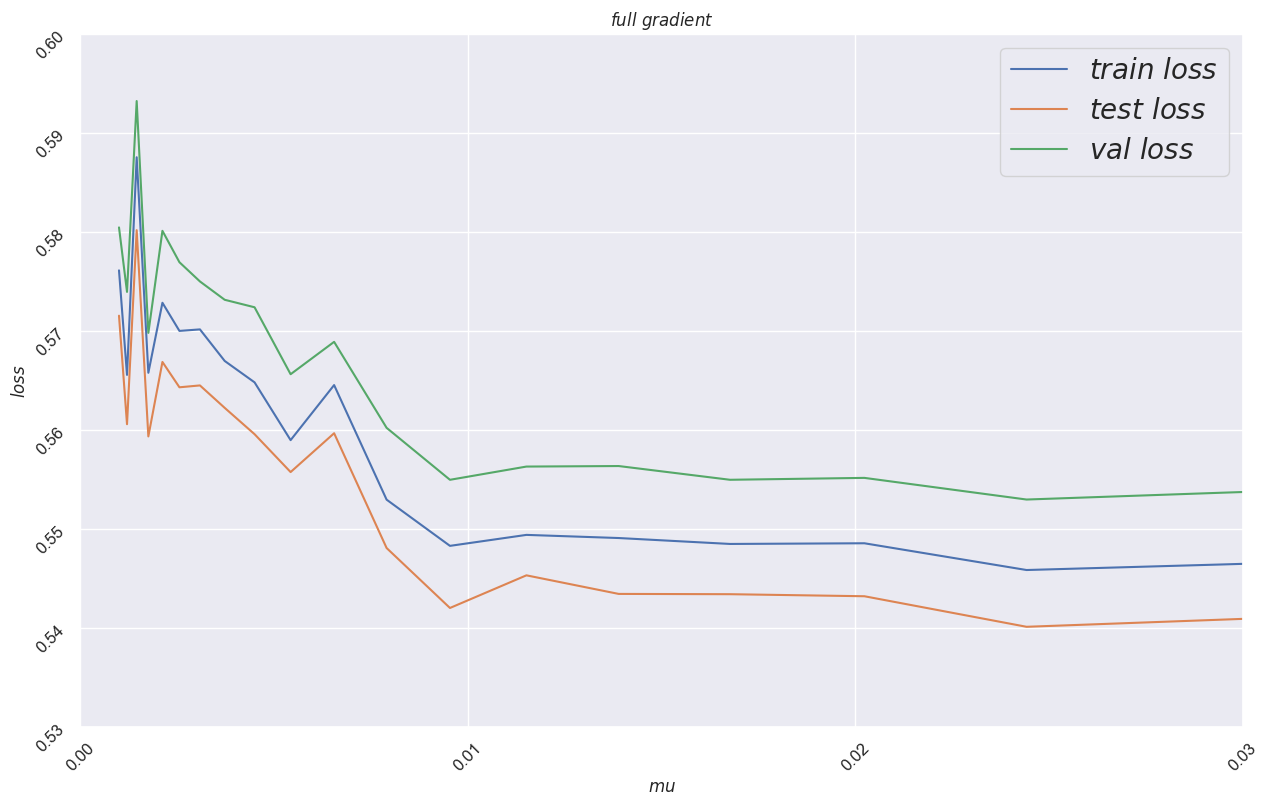

In [83]:
# график зависимости ошибки относительно мю для полного градиента

fig = plt.figure(figsize=(15, 9))
ax = fig.add_subplot(111)
ax.set_xlim([0, 0.03])
ax.set_ylim([0.53, 0.6])
ax.set_title(r'$full\ gradient$')
ax.set_xlabel(r'$mu$')
ax.set_ylabel(r'$loss$')
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.01))
ax.tick_params(labelrotation=45,
               labelsize=12)
ax.plot(df_mu_score_full.mu, df_mu_score_full.train_loss, label=r'$train\ loss$')
ax.plot(df_mu_score_full.mu, df_mu_score_full.test_loss, label=r'$test\ loss$')
ax.plot(df_mu_score_full.mu, df_mu_score_full.val_loss, label=r'$val\ loss$')
plt.legend(fontsize=20)
plt.show();

In [ ]:
# best mu respect to loss for full grad - 0.024421

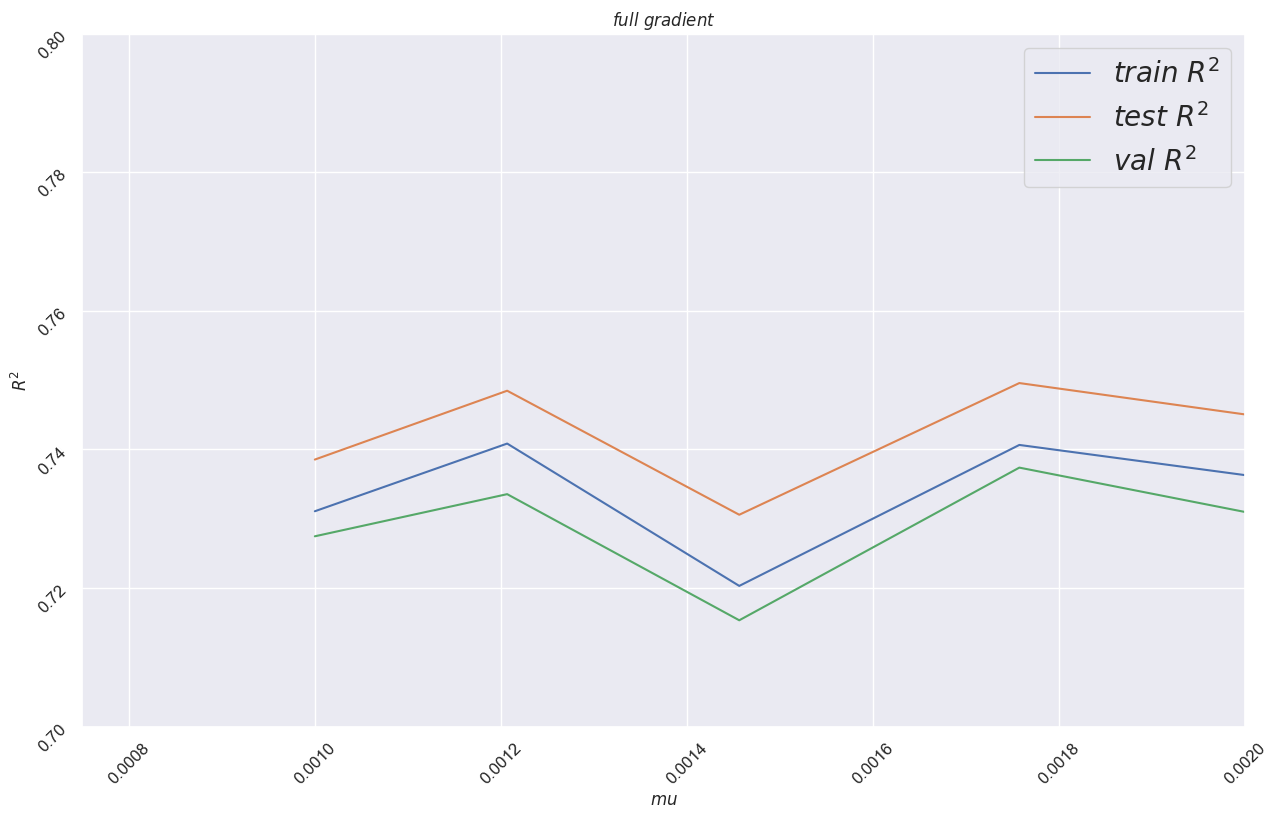

In [81]:
# график зависимости R^2 относительно мю для полного градиента
fig = plt.figure(figsize=(15, 9))
ax = fig.add_subplot(111)
ax.set_xlim([0.00075, 0.002])
ax.set_ylim([0.7, 0.8])
ax.set_title(r'$full\ gradient$')
ax.set_xlabel(r'$mu$')
ax.set_ylabel(r'$R^2$')
# ax.xaxis.set_major_locator(ticker.MultipleLocator(0.01))
ax.tick_params(labelrotation=45,
               labelsize=12)
ax.plot(df_mu_score_full.mu, df_mu_score_full['train_R^2'], label=r'$train\ R^2$')
ax.plot(df_mu_score_full.mu, df_mu_score_full['test_R^2'], label=r'$test\ R^2$')
ax.plot(df_mu_score_full.mu, df_mu_score_full['val_R^2'], label=r'$val\ R^2$')
plt.legend(fontsize=20)
plt.show();

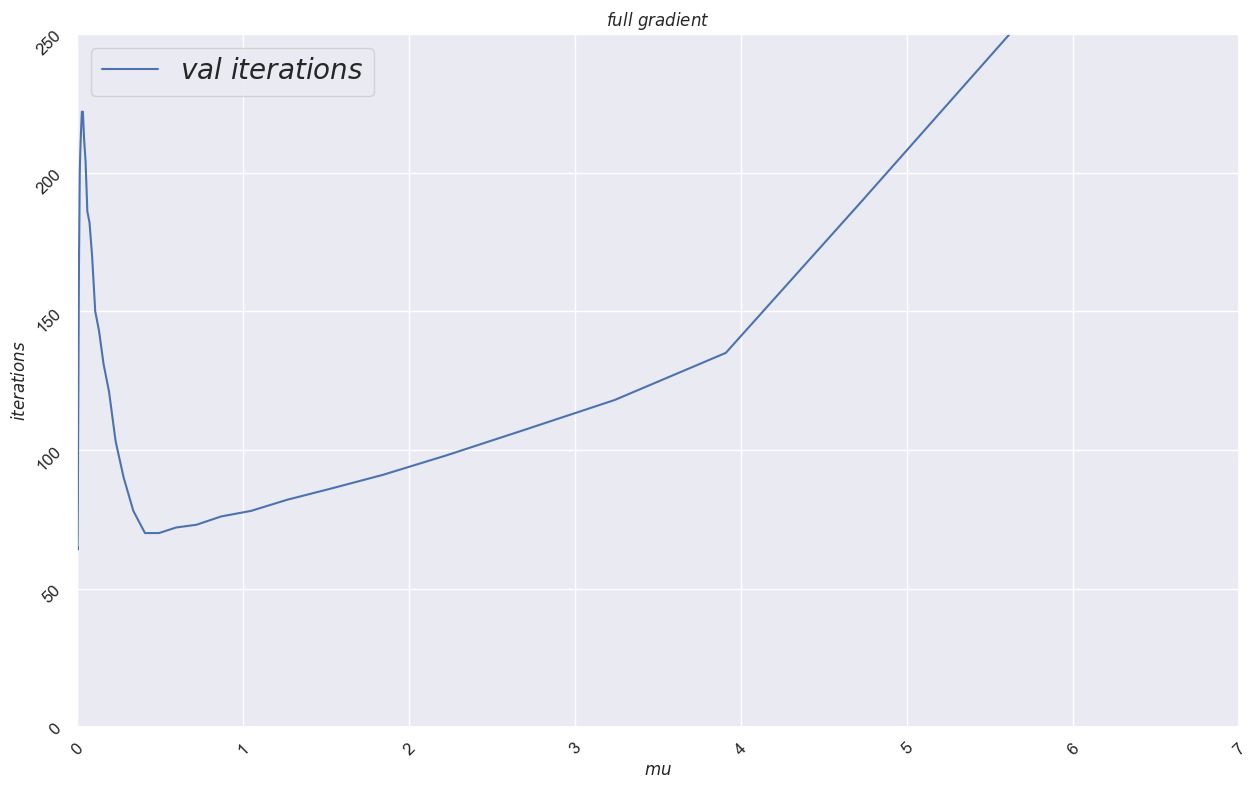

In [88]:
# график зависимости кол-ва итераций относительно мю для полного градиента
fig = plt.figure(figsize=(15, 9))
ax = fig.add_subplot(111)
ax.set_xlim([0, 7])
ax.set_ylim([0, 250])
ax.set_title(r'$full\ gradient$')
ax.set_xlabel(r'$mu$')
ax.set_ylabel(r'$iterations$')
# ax.xaxis.set_major_locator(ticker.MultipleLocator(0.01))
ax.tick_params(labelrotation=45,
               labelsize=12)
ax.plot(df_mu_score_full.mu, df_mu_score_full['iterations'], label=r'$val\ iterations$')
plt.legend(fontsize=20)
plt.show();

In [109]:
df_mu_score_stochastic = df_mu_score[df_mu_score.method == 'stochastic']
df_mu_score_stochastic

method         mu  val_loss  train_loss  test_loss   val_R^2  \
50  stochastic   0.001000  0.592136    0.584642   0.581674  0.716374   
51  stochastic   0.001207  0.604308    0.595930   0.592868  0.704594   
52  stochastic   0.001456  0.602760    0.595341   0.591124  0.706106   
53  stochastic   0.001758  0.589560    0.587316   0.581646  0.718837   
54  stochastic   0.002121  0.601881    0.596893   0.587846  0.706962   
55  stochastic   0.002560  0.600723    0.596406   0.592736  0.708089   
56  stochastic   0.003089  0.599952    0.594210   0.588235  0.708837   
57  stochastic   0.003728  0.609278    0.604631   0.600387  0.699715   
58  stochastic   0.004498  0.590565    0.582757   0.578310  0.717878   
59  stochastic   0.005429  0.592100    0.586576   0.581290  0.716409   
60  stochastic   0.006551  0.603689    0.593650   0.588689  0.705199   
61  stochastic   0.007906  0.592405    0.586169   0.582586  0.716116   
62  stochastic   0.009541  0.584078    0.574640   0.571775  0.724041   
63  stochastic   0.011514  0.589186    0.582912   0.574447  0.719194   
64  stochastic   0.013895  0.580448    0.574371   0.569454  0.727460   
65  stochastic   0.016768  0.578135    0.572542   0.567747  0.729628   
66  stochastic   0.020236  0.578162    0.571763   0.567679  0.729603   
67  stochastic   0.024421  0.573405    0.567726   0.562848  0.734034   
68  stochastic   0.029471  0.585392    0.580649   0.573971  0.722799   
69  stochastic   0.035565  0.578617    0.571543   0.566679  0.729178   
70  stochastic   0.042919  0.576575    0.570377   0.566639  0.731086   
71  stochastic   0.051795  0.573272    0.565337   0.561300  0.734158   
72  stochastic   0.062506  0.568051    0.560778   0.555630  0.738978   
73  stochastic   0.075431  0.568939    0.560102   0.554909  0.738162   
74  stochastic   0.091030  0.571445    0.564483   0.558690  0.735850   
75  stochastic   0.109854  0.575118    0.567138   0.561680  0.732443   
76  stochastic   0.132571  0.574022    0.565740   0.560726  0.733462   
77  stochastic   0.159986  0.576814    0.569770   0.565061  0.730863   
78  stochastic   0.193070  0.578618    0.570933   0.565643  0.729177   
79  stochastic   0.232995  0.578957    0.570652   0.566186  0.728859   
80  stochastic   0.281177  0.583556    0.575300   0.570743  0.724534   
81  stochastic   0.339322  0.592161    0.583485   0.578898  0.716351   
82  stochastic   0.409492  0.599596    0.591469   0.587643  0.709183   
83  stochastic   0.494171  0.603286    0.595949   0.592542  0.705593   
84  stochastic   0.596362  0.608444    0.602137   0.599215  0.700537   
85  stochastic   0.719686  0.622890    0.615300   0.612893  0.686148   
86  stochastic   0.868511  0.638189    0.632476   0.630457  0.670541   
87  stochastic   1.048113  0.656748    0.650455   0.649249  0.651101   
88  stochastic   1.264855  0.668599    0.663534   0.662667  0.638396   
89  stochastic   1.526418  0.684269    0.678286   0.678113  0.621247   
90  stochastic   1.842070  0.735037    0.731038   0.731967  0.562961   
91  stochastic   2.222996  0.729816    0.725414   0.726767  0.569147   
92  stochastic   2.682696  0.777470    0.773714   0.776159  0.511045   
93  stochastic   3.237458  0.798492    0.794580   0.797407  0.484245   
94  stochastic   3.906940  0.805373    0.801979   0.804658  0.475318   
95  stochastic   4.714866  0.854343    0.851407   0.854924  0.409572   
96  stochastic   5.689866  0.844625    0.841381   0.844858  0.422928   
97  stochastic   6.866488  0.886382    0.884010   0.888075  0.364459   
98  stochastic   8.286428  0.927530    0.925408   0.930107  0.304082   
99  stochastic  10.000000  0.946436    0.944778   0.949379  0.275423   

    train_R^2  test_R^2  iterations  
50   0.723050  0.729173         285  
51   0.712253  0.718648         301  
52   0.712821  0.720301         301  
53   0.720511  0.729199         301  
54   0.711322  0.723395         285  
55   0.711793  0.718773         245  
56   0.713911  0.723028         301  
57   0.703788  0.711467        

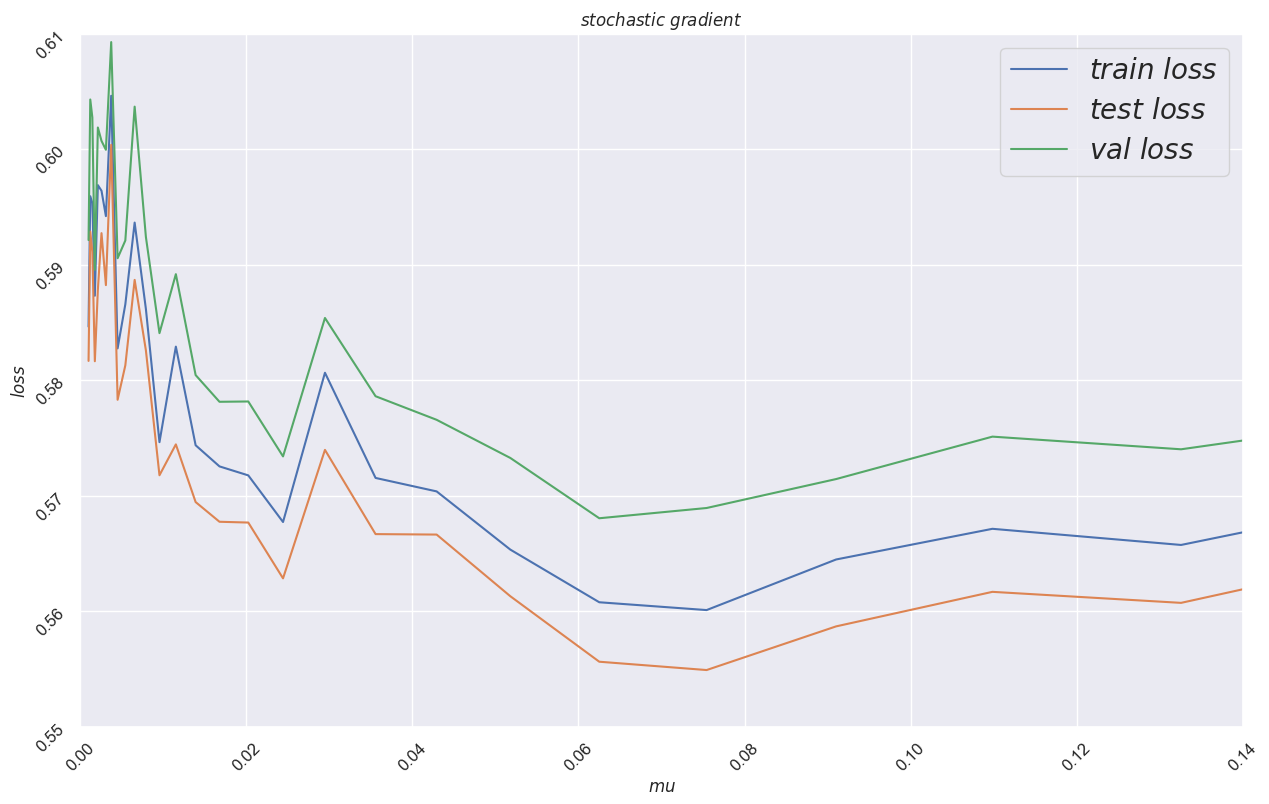

In [107]:
# график зависимости ошибки относительно мю для стохастического градиента

fig = plt.figure(figsize=(15, 9))
ax = fig.add_subplot(111)
ax.set_xlim([0, 0.14])
ax.set_ylim([0.55, 0.61])
ax.set_title(r'$stochastic\ gradient$')
ax.set_xlabel(r'$mu$')
ax.set_ylabel(r'$loss$')
# ax.xaxis.set_major_locator(ticker.MultipleLocator(0.01))
ax.tick_params(labelrotation=45,
               labelsize=12)
ax.plot(df_mu_score_stochastic.mu, df_mu_score_stochastic.train_loss, label=r'$train\ loss$')
ax.plot(df_mu_score_stochastic.mu, df_mu_score_stochastic.test_loss, label=r'$test\ loss$')
ax.plot(df_mu_score_stochastic.mu, df_mu_score_stochastic.val_loss, label=r'$val\ loss$')
plt.legend(fontsize=20)
plt.show();

In [ ]:
# best mu respect to loss for stochastic grad - 0.075431

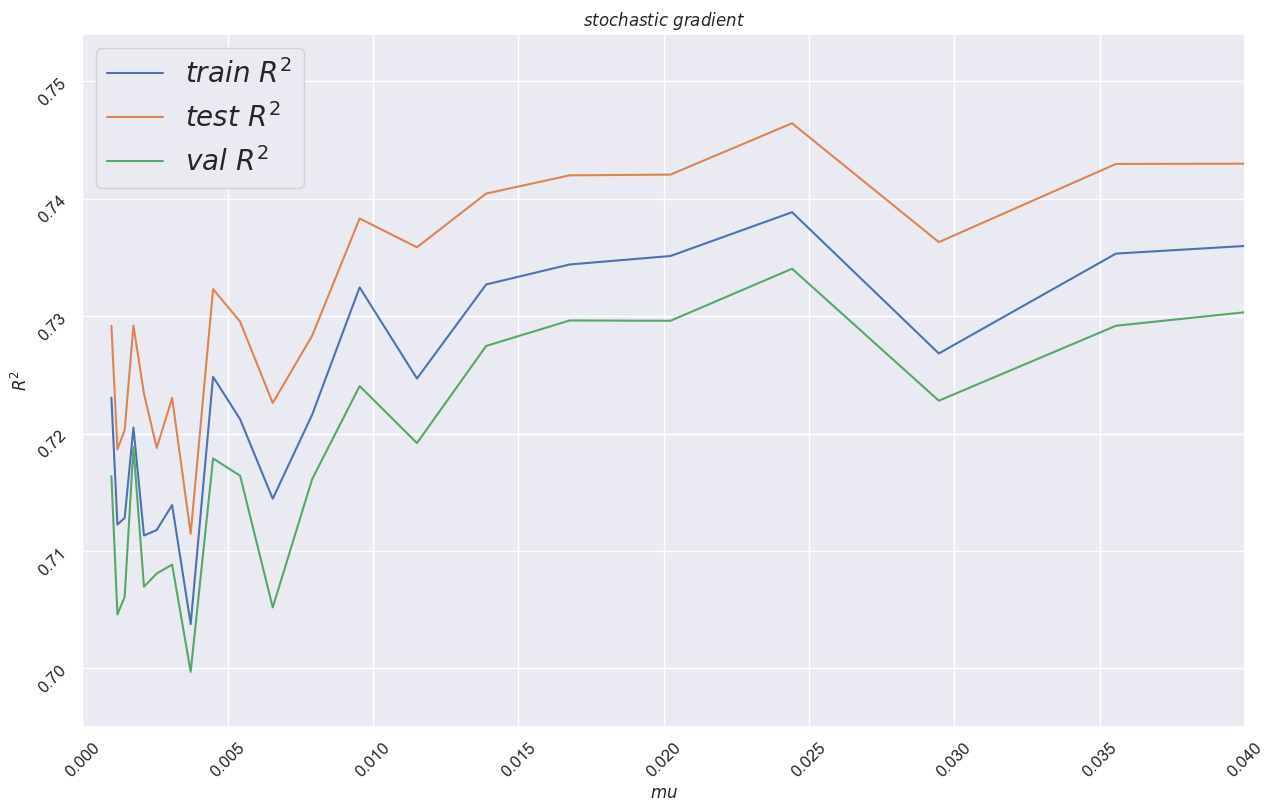

In [128]:
# график зависимости R^2 относительно мю для стохастического градиента
fig = plt.figure(figsize=(15, 9))
ax = fig.add_subplot(111)
ax.set_xlim([0, 0.04])
ax.set_ylim([0.695, 0.754])
ax.set_title(r'$stochastic\ gradient$')
ax.set_xlabel(r'$mu$')
ax.set_ylabel(r'$R^2$')
# ax.xaxis.set_major_locator(ticker.MultipleLocator(0.01))
ax.tick_params(labelrotation=45,
               labelsize=12)
ax.plot(df_mu_score_stochastic.mu, df_mu_score_stochastic['train_R^2'], label=r'$train\ R^2$')
ax.plot(df_mu_score_stochastic.mu, df_mu_score_stochastic['test_R^2'], label=r'$test\ R^2$')
ax.plot(df_mu_score_stochastic.mu, df_mu_score_stochastic['val_R^2'], label=r'$val\ R^2$')
plt.legend(fontsize=20)
plt.show();

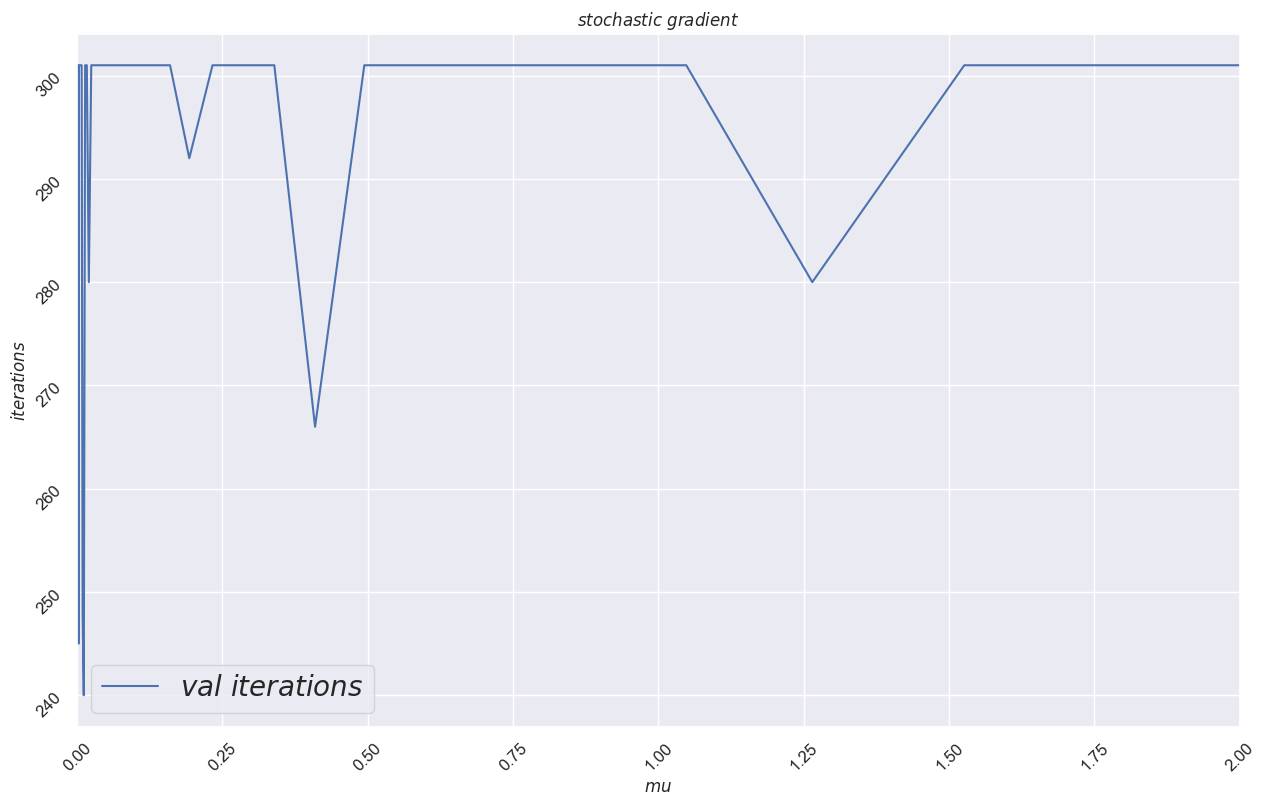

In [131]:
# график зависимости кол-ва итераций относительно мю для стохастического градиента
fig = plt.figure(figsize=(15, 9))
ax = fig.add_subplot(111)
ax.set_xlim([0, 2])
# ax.set_ylim([0, 250])
ax.set_title(r'$stochastic\ gradient$')
ax.set_xlabel(r'$mu$')
ax.set_ylabel(r'$iterations$')
# ax.xaxis.set_major_locator(ticker.MultipleLocator(0.01))
ax.tick_params(labelrotation=45,
               labelsize=12)
ax.plot(df_mu_score_stochastic.mu, df_mu_score_stochastic['iterations'], label=r'$val\ iterations$')
plt.legend(fontsize=20)
plt.show();

In [132]:
df_mu_score_momentum = df_mu_score[df_mu_score.method == 'momentum']
df_mu_score_momentum

method         mu  val_loss  train_loss  test_loss   val_R^2  \
100  momentum   0.001000  0.535325    0.530644   0.526728  0.768187   
101  momentum   0.001207  0.534018    0.529666   0.524368  0.769317   
102  momentum   0.001456  0.533169    0.528859   0.524341  0.770050   
103  momentum   0.001758  0.532093    0.526649   0.521384  0.770978   
104  momentum   0.002121  0.531296    0.526395   0.521892  0.771663   
105  momentum   0.002560  0.531635    0.526830   0.521917  0.771372   
106  momentum   0.003089  0.531281    0.526125   0.521239  0.771677   
107  momentum   0.003728  0.530743    0.525752   0.520691  0.772138   
108  momentum   0.004498  0.531656    0.526287   0.521182  0.771354   
109  momentum   0.005429  0.532907    0.527421   0.522377  0.770277   
110  momentum   0.006551  0.533692    0.528132   0.523127  0.769599   
111  momentum   0.007906  0.534989    0.529132   0.524139  0.768478   
112  momentum   0.009541  0.536307    0.530038   0.525056  0.767336   
113  momentum   0.011514  0.537798    0.531332   0.526245  0.766040   
114  momentum   0.013895  0.539612    0.532916   0.527773  0.764459   
115  momentum   0.016768  0.541498    0.534585   0.529397  0.762810   
116  momentum   0.020236  0.543300    0.536145   0.531117  0.761229   
117  momentum   0.024421  0.545213    0.537841   0.532750  0.759545   
118  momentum   0.029471  0.548536    0.541017   0.535691  0.756604   
119  momentum   0.035565  0.553859    0.546305   0.541634  0.751858   
120  momentum   0.042919  0.559359    0.551634   0.546948  0.746905   
121  momentum   0.051795  0.564770    0.557096   0.552560  0.741985   
122  momentum   0.062506  0.566842    0.559058   0.554538  0.740088   
123  momentum   0.075431  0.572828    0.565053   0.560784  0.734569   
124  momentum   0.091030  0.568221    0.560485   0.555289  0.738822   
125  momentum   0.109854  0.566195    0.558241   0.553159  0.740681   
126  momentum   0.132571  0.571664    0.563814   0.558711  0.735647   
127  momentum   0.159986  0.577959    0.570377   0.565666  0.729793   
128  momentum   0.193070  0.585449    0.577928   0.573219  0.722744   
129  momentum   0.232995  0.584195    0.576655   0.573055  0.723931   
130  momentum   0.281177  0.589879    0.582333   0.578964  0.718533   
131  momentum   0.339322  0.601180    0.593744   0.589057  0.707644   
132  momentum   0.409492  0.600427    0.593160   0.590219  0.708377   
133  momentum   0.494171  0.612017    0.605032   0.602694  0.697010   
134  momentum   0.596362  0.619261    0.612582   0.609892  0.689795   
135  momentum   0.719686  0.629985    0.623445   0.620758  0.678958   
136  momentum   0.868511  0.639226    0.632857   0.631565  0.669469   
137  momentum   1.048113  0.654649    0.648789   0.647227  0.653327   
138  momentum   1.264855  0.672352    0.666869   0.666136  0.634325   
139  momentum   1.526418  0.692379    0.687052   0.687488  0.612216   
140  momentum   1.842070  0.713341    0.708394   0.709351  0.588380   
141  momentum   2.222996  0.732751    0.728431   0.729282  0.565675   
142  momentum   2.682696  0.760767    0.756917   0.758320  0.531827   
143  momentum   3.237458  0.785933    0.782469   0.784410  0.500341   
144  momentum   3.906940  0.814864    0.811191   0.814446  0.462878   
145  momentum   4.714866  0.840763    0.837400   0.841045  0.428194   
146  momentum   5.689866  0.879525    0.876394   0.880743  0.374254   
147  momentum   6.866488  0.894368    0.891850   0.896070  0.352955   
148  momentum   8.286428  0.968526    0.967889   0.969849  0.241204   
149  momentum  10.000000  0.945617    0.944173   0.948406  0.276676   

     train_R^2  test_R^2  iterations  
100   0.771846  0.777922         128  
101   0.772687  0.779907         132  
102   0.773379  0.779930         149  
103   0.775269  0.782405         158  
104   0.775486  0.781981         177  
105   0.775114  0.781960         198  
106   0.775716  0.782526         198  
107   0.776033  0.782983         218  
108   0.775577  0.782574         2

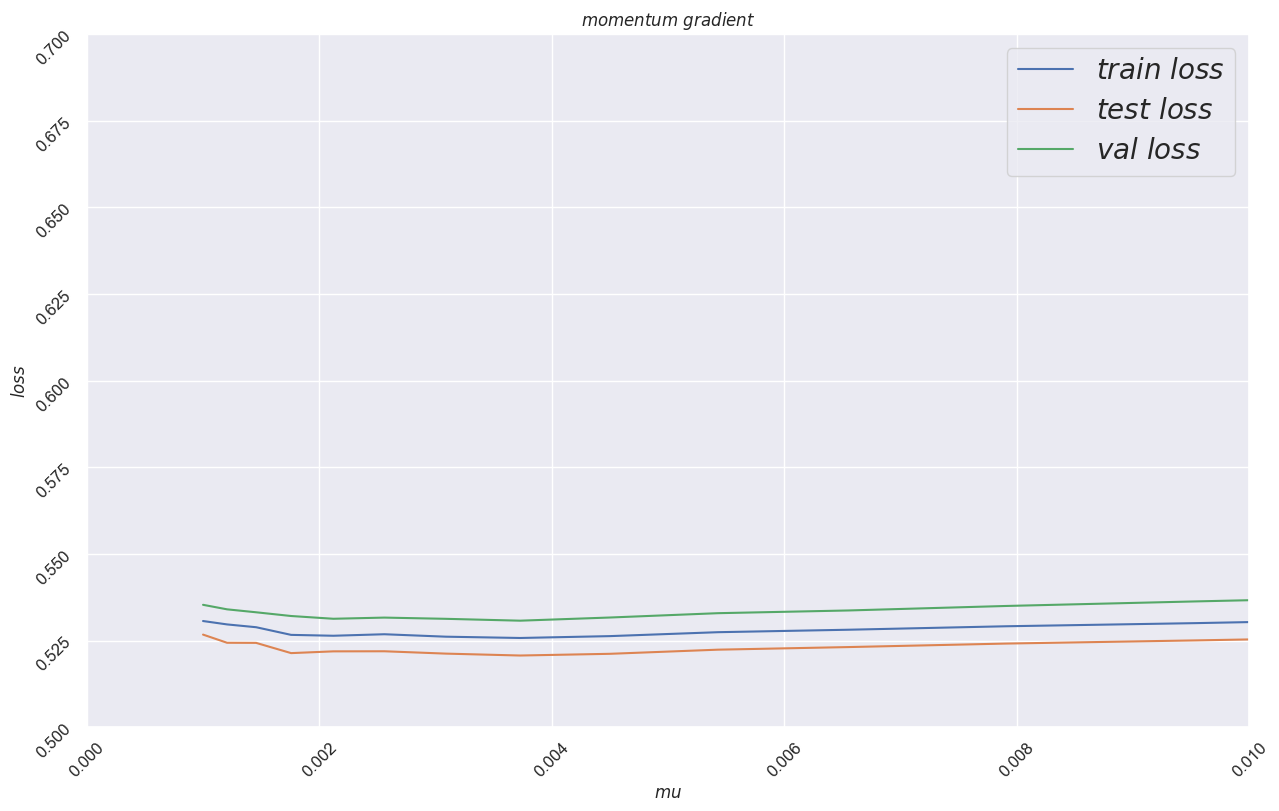

In [149]:
# график зависимости ошибки относительно мю для momentum градиента

fig = plt.figure(figsize=(15, 9))
ax = fig.add_subplot(111)
ax.set_xlim([0, 0.01])
ax.set_ylim([0.5, 0.7])
ax.set_title(r'$momentum\ gradient$')
ax.set_xlabel(r'$mu$')
ax.set_ylabel(r'$loss$')
# ax.xaxis.set_major_locator(ticker.MultipleLocator(0.01))
ax.tick_params(labelrotation=45,
               labelsize=12)
ax.plot(df_mu_score_momentum.mu, df_mu_score_momentum.train_loss, label=r'$train\ loss$')
ax.plot(df_mu_score_momentum.mu, df_mu_score_momentum.test_loss, label=r'$test\ loss$')
ax.plot(df_mu_score_momentum.mu, df_mu_score_momentum.val_loss, label=r'$val\ loss$')
plt.legend(fontsize=20)
plt.show();

In [134]:
# best mu respect to loss for momentum grad - 0.003728

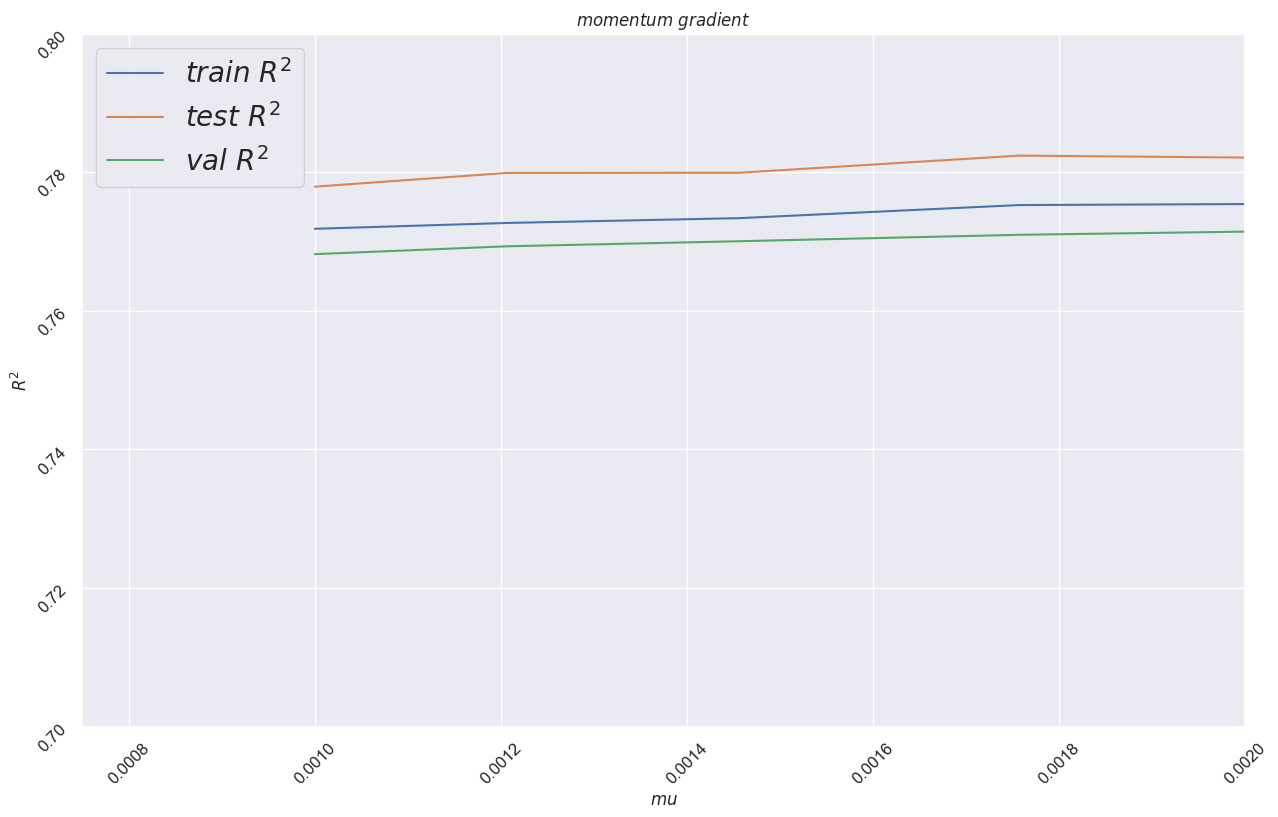

In [156]:
# график зависимости R^2 относительно мю для momentum градиента
fig = plt.figure(figsize=(15, 9))
ax = fig.add_subplot(111)
ax.set_xlim([0.00075, 0.002])
ax.set_ylim([0.7, 0.8])
ax.set_title(r'$momentum\ gradient$')
ax.set_xlabel(r'$mu$')
ax.set_ylabel(r'$R^2$')
# ax.xaxis.set_major_locator(ticker.MultipleLocator(0.01))
ax.tick_params(labelrotation=45,
               labelsize=12)
ax.plot(df_mu_score_momentum.mu, df_mu_score_momentum['train_R^2'], label=r'$train\ R^2$')
ax.plot(df_mu_score_momentum.mu, df_mu_score_momentum['test_R^2'], label=r'$test\ R^2$')
ax.plot(df_mu_score_momentum.mu, df_mu_score_momentum['val_R^2'], label=r'$val\ R^2$')
plt.legend(fontsize=20)
plt.show();

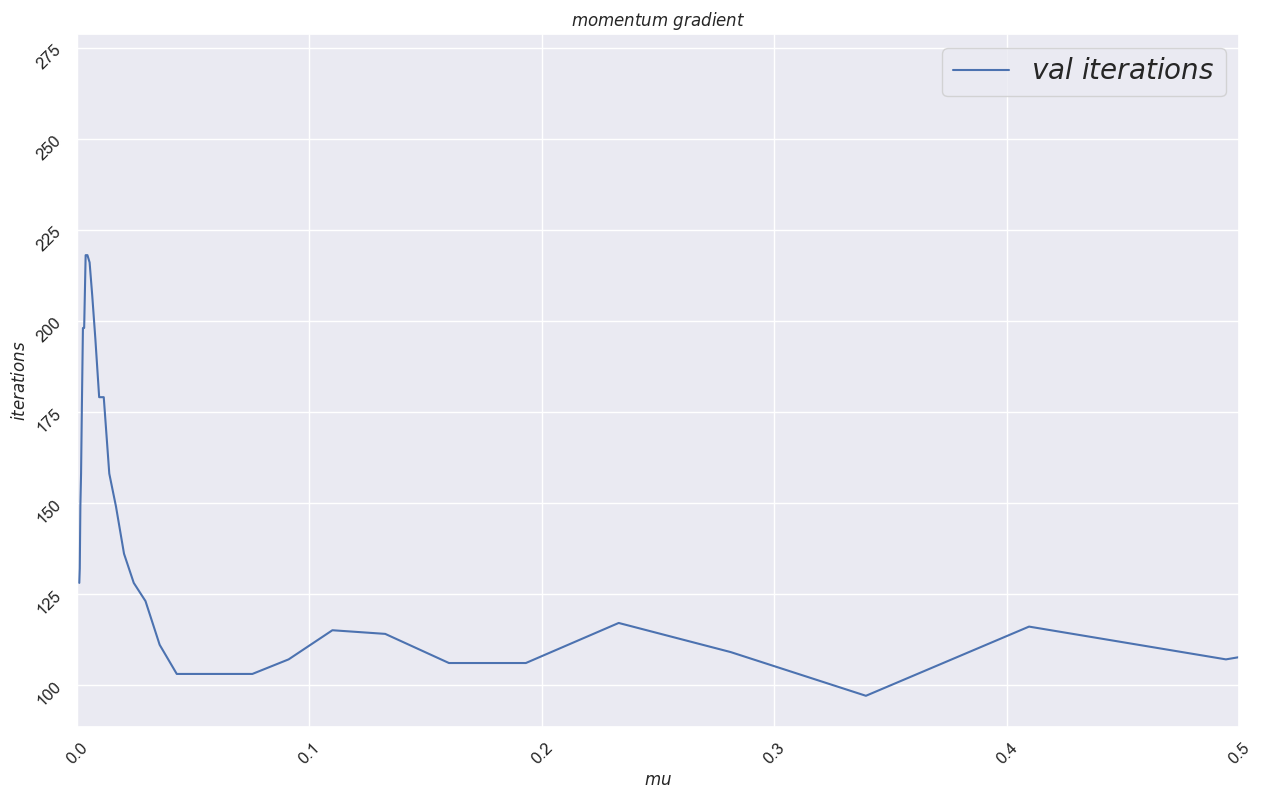

In [173]:
# график зависимости кол-ва итераций относительно мю для momentum градиента
fig = plt.figure(figsize=(15, 9))
ax = fig.add_subplot(111)
ax.set_xlim([0, 0.5])
# ax.set_ylim([0, 250])
ax.set_title(r'$momentum\ gradient$')
ax.set_xlabel(r'$mu$')
ax.set_ylabel(r'$iterations$')
# ax.xaxis.set_major_locator(ticker.MultipleLocator(0.01))
ax.tick_params(labelrotation=45,
               labelsize=12)
ax.plot(df_mu_score_momentum.mu, df_mu_score_momentum['iterations'], label=r'$val\ iterations$')
plt.legend(fontsize=20)
plt.show();

In [ ]:
# оптимальное значение мю - 0.339322(самое минимальное кол-во итераций)

In [158]:
df_mu_score_adam = df_mu_score[df_mu_score.method == 'adam']
df_mu_score_adam

method         mu  val_loss  train_loss  test_loss   val_R^2  train_R^2  \
150   adam   0.001000  0.522116    0.519833   0.515176  0.779486   0.781048   
151   adam   0.001207  0.523181    0.520825   0.516151  0.778585   0.780211   
152   adam   0.001456  0.524116    0.521598   0.516882  0.777793   0.779559   
153   adam   0.001758  0.524818    0.521747   0.517076  0.777198   0.779433   
154   adam   0.002121  0.526538    0.523481   0.518752  0.775735   0.777964   
155   adam   0.002560  0.528191    0.525089   0.520205  0.774325   0.776598   
156   adam   0.003089  0.529421    0.526103   0.521074  0.773272   0.775735   
157   adam   0.003728  0.532119    0.529203   0.523852  0.770955   0.773083   
158   adam   0.004498  0.532992    0.529133   0.523992  0.770203   0.773143   
159   adam   0.005429  0.536233    0.532956   0.527401  0.767400   0.769854   
160   adam   0.006551  0.537365    0.533446   0.527946  0.766417   0.769430   
161   adam   0.007906  0.540742    0.536822   0.531172  0.763473   0.766502   
162   adam   0.009541  0.541817    0.537173   0.531624  0.762531   0.766197   
163   adam   0.011514  0.544665    0.539759   0.534172  0.760028   0.763941   
164   adam   0.013895  0.547381    0.542281   0.536590  0.757629   0.761730   
165   adam   0.016768  0.550519    0.545320   0.539583  0.754841   0.759051   
166   adam   0.020236  0.553026    0.547288   0.541586  0.752603   0.757309   
167   adam   0.024421  0.556541    0.550702   0.544957  0.749449   0.754272   
168   adam   0.029471  0.560121    0.554000   0.548220  0.746215   0.751320   
169   adam   0.035565  0.566443    0.560304   0.554455  0.740454   0.745628   
170   adam   0.042919  0.562693    0.555589   0.549940  0.743879   0.749892   
171   adam   0.051795  0.565121    0.557771   0.552142  0.741664   0.747923   
172   adam   0.062506  0.565076    0.557399   0.551847  0.741705   0.748259   
173   adam   0.075431  0.564180    0.556267   0.550833  0.742524   0.749281   
174   adam   0.091030  0.567887    0.559913   0.554490  0.739129   0.745983   
175   adam   0.109854  0.567414    0.559340   0.554096  0.739563   0.746503   
176   adam   0.132571  0.570424    0.562335   0.557179  0.736793   0.743780   
177   adam   0.159986  0.572283    0.564225   0.559282  0.735074   0.742055   
178   adam   0.193070  0.575874    0.567866   0.563085  0.731740   0.738716   
179   adam   0.232995  0.579845    0.571929   0.567374  0.728027   0.734964   
180   adam   0.281177  0.584644    0.576847   0.572551  0.723506   0.730386   
181   adam   0.339322  0.590474    0.582806   0.578757  0.717964   0.724787   
182   adam   0.409492  0.597017    0.589559   0.585913  0.711680   0.718372   
183   adam   0.494171  0.605001    0.597805   0.594615  0.703917   0.710439   
184   adam   0.596362  0.614315    0.607365   0.604644  0.694729   0.701104   
185   adam   0.719686  0.626038    0.619431   0.617293  0.682967   0.689110   
186   adam   0.868511  0.637902    0.631542   0.629802  0.670838   0.676834   
187   adam   1.048113  0.655369    0.649448   0.648421  0.652564   0.658249   
188   adam   1.264855  0.671089    0.665537   0.665106  0.635698   0.641107   
189   adam   1.526418  0.690183    0.684984   0.685115  0.614672   0.619827   
190   adam   1.842070  0.707271    0.702418   0.703006  0.595355   0.600228   
191   adam   2.222996  0.732065    0.727665   0.728839  0.566487   0.570973   
192   adam   2.682696  0.756822    0.752726   0.754469  0.536671   0.540912   
193   adam   3.237458  0.783446    0.779678   0.781986  0.503499   0.507448   
194   adam   3.906940  0.809975    0.806564   0.809391  0.469305   0.472892   
195   adam   4.714866  0.839897    0.836835   0.840162  0.429370   0.432585   
196   adam   5.689866  0.865589    0.862772   0.866504  0.393926   0.396867   
197   adam   6.866488  0.890377    0.887862   0.891989  0.358716   0.361277   
198   adam   8.286428  0.917985    0.915688   0.920210  0.318331   0.320614   
199   adam  10.000000  0.943599    0.941615   0.946455

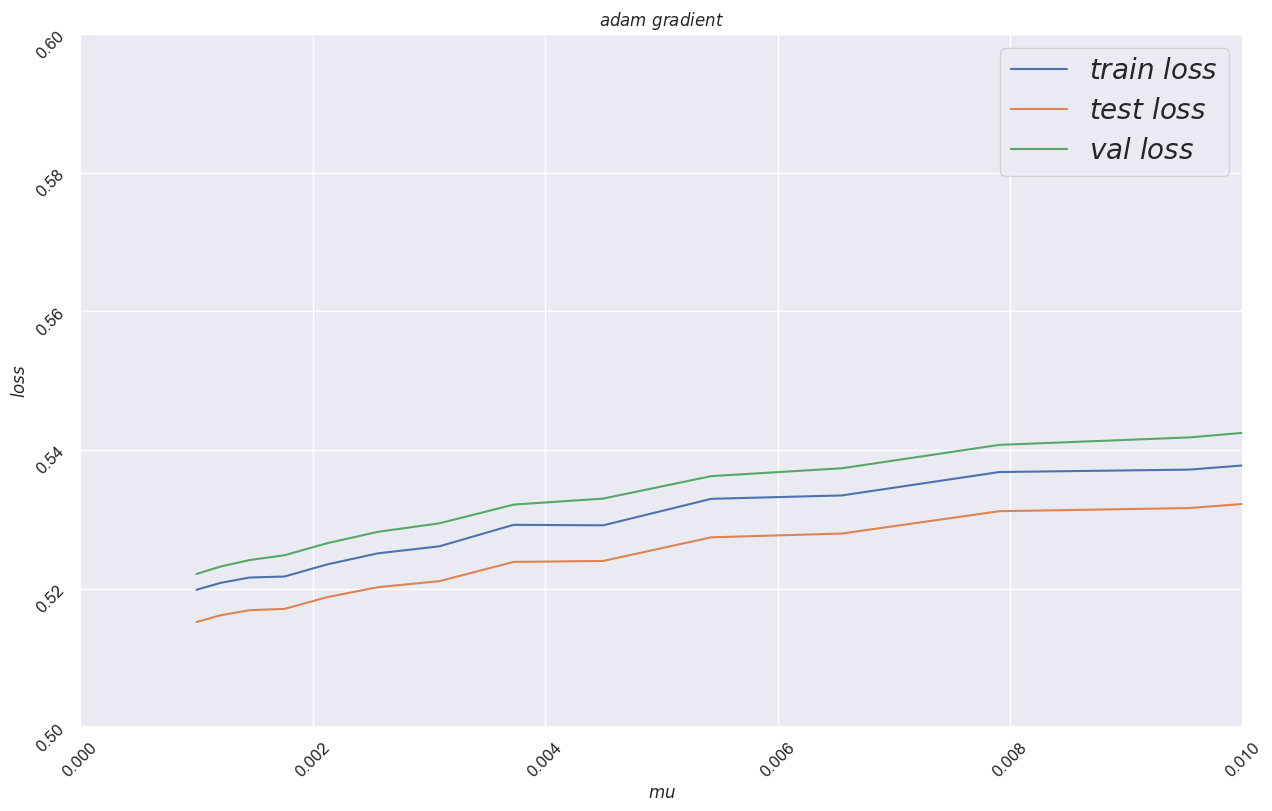

In [167]:
# график зависимости ошибки относительно мю для adam градиента

fig = plt.figure(figsize=(15, 9))
ax = fig.add_subplot(111)
ax.set_xlim([0, 0.01])
ax.set_ylim([0.5, 0.6])
ax.set_title(r'$adam\ gradient$')
ax.set_xlabel(r'$mu$')
ax.set_ylabel(r'$loss$')
# ax.xaxis.set_major_locator(ticker.MultipleLocator(0.01))
ax.tick_params(labelrotation=45,
               labelsize=12)
ax.plot(df_mu_score_adam.mu, df_mu_score_adam.train_loss, label=r'$train\ loss$')
ax.plot(df_mu_score_adam.mu, df_mu_score_adam.test_loss, label=r'$test\ loss$')
ax.plot(df_mu_score_adam.mu, df_mu_score_adam.val_loss, label=r'$val\ loss$')
plt.legend(fontsize=20)
plt.show();

In [134]:
# best mu respect to loss for momentum grad - 0.001000

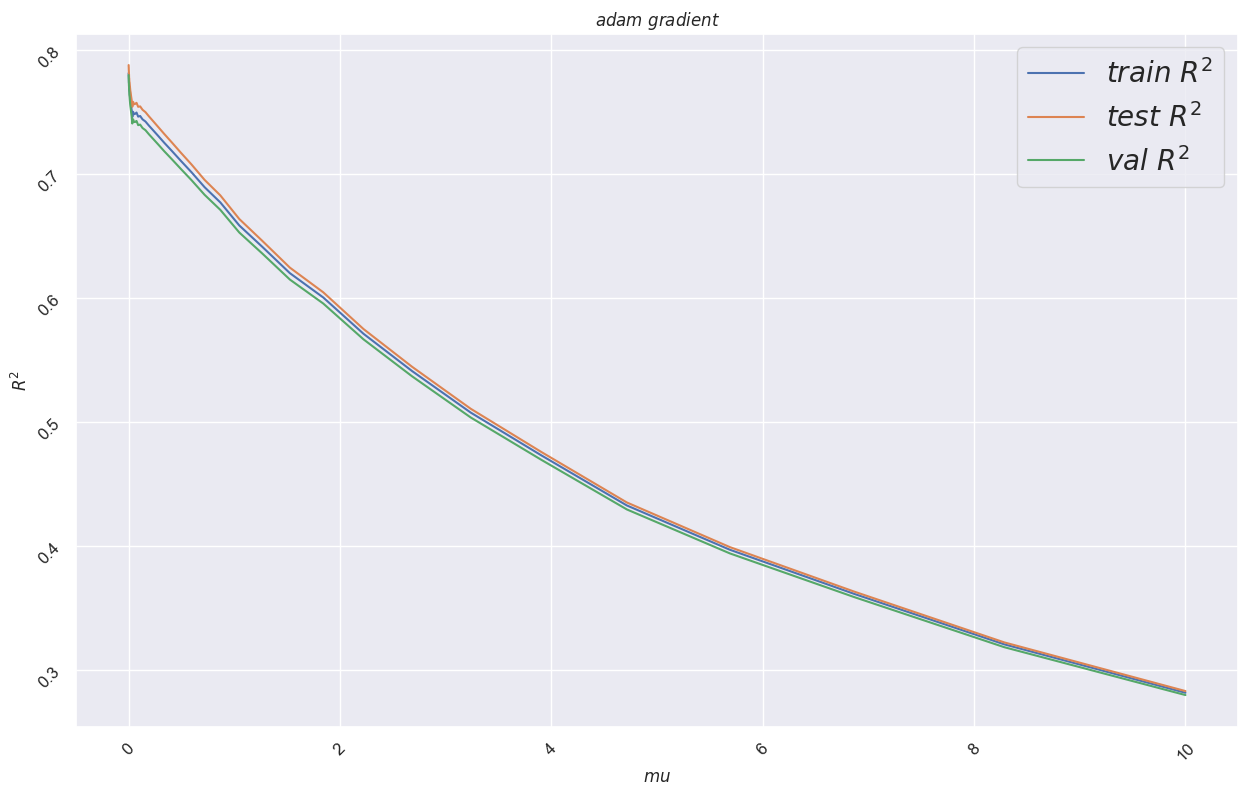

In [168]:
# график зависимости R^2 относительно мю для adam градиента
fig = plt.figure(figsize=(15, 9))
ax = fig.add_subplot(111)
# ax.set_xlim([0.00075, 0.002])
# ax.set_ylim([0.7, 0.8])
ax.set_title(r'$adam\ gradient$')
ax.set_xlabel(r'$mu$')
ax.set_ylabel(r'$R^2$')
# ax.xaxis.set_major_locator(ticker.MultipleLocator(0.01))
ax.tick_params(labelrotation=45,
               labelsize=12)
ax.plot(df_mu_score_adam.mu, df_mu_score_adam['train_R^2'], label=r'$train\ R^2$')
ax.plot(df_mu_score_adam.mu, df_mu_score_adam['test_R^2'], label=r'$test\ R^2$')
ax.plot(df_mu_score_adam.mu, df_mu_score_adam['val_R^2'], label=r'$val\ R^2$')
plt.legend(fontsize=20)
plt.show();

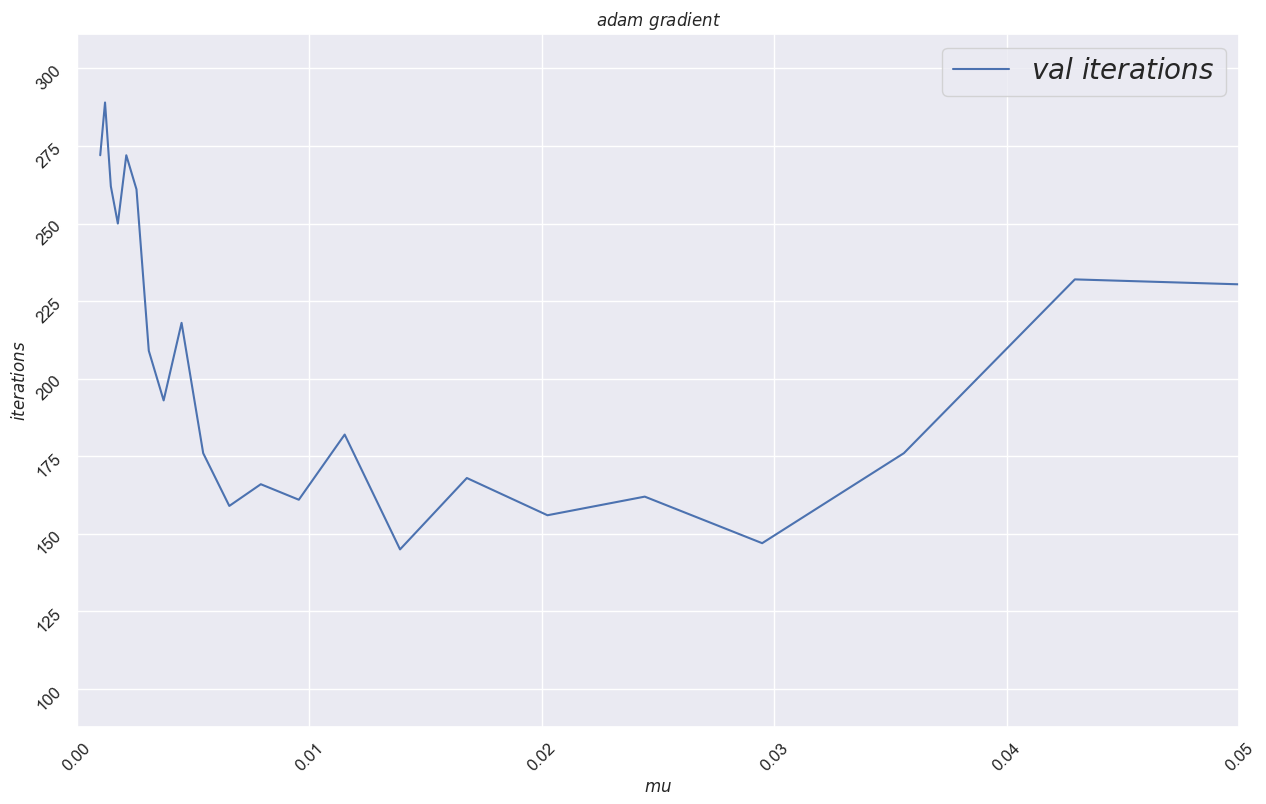

In [174]:
# график зависимости кол-ва итераций относительно мю для adam градиента
fig = plt.figure(figsize=(15, 9))
ax = fig.add_subplot(111)
ax.set_xlim([0, 0.05])
# ax.set_ylim([0, 250])
ax.set_title(r'$adam\ gradient$')
ax.set_xlabel(r'$mu$')
ax.set_ylabel(r'$iterations$')
# ax.xaxis.set_major_locator(ticker.MultipleLocator(0.01))
ax.tick_params(labelrotation=45,
               labelsize=12)
ax.plot(df_mu_score_adam.mu, df_mu_score_adam['iterations'], label=r'$val\ iterations$')
plt.legend(fontsize=20)
plt.show();

In [ ]:
# оптимальное значение мю - 0.013895(самое минимальное кол-во итераций)

In [176]:
best_mus = {'full': 0.024421,
            'stochastic': 0.075431,
            'momentum': 0.339322,
            'adam': 0.013895}

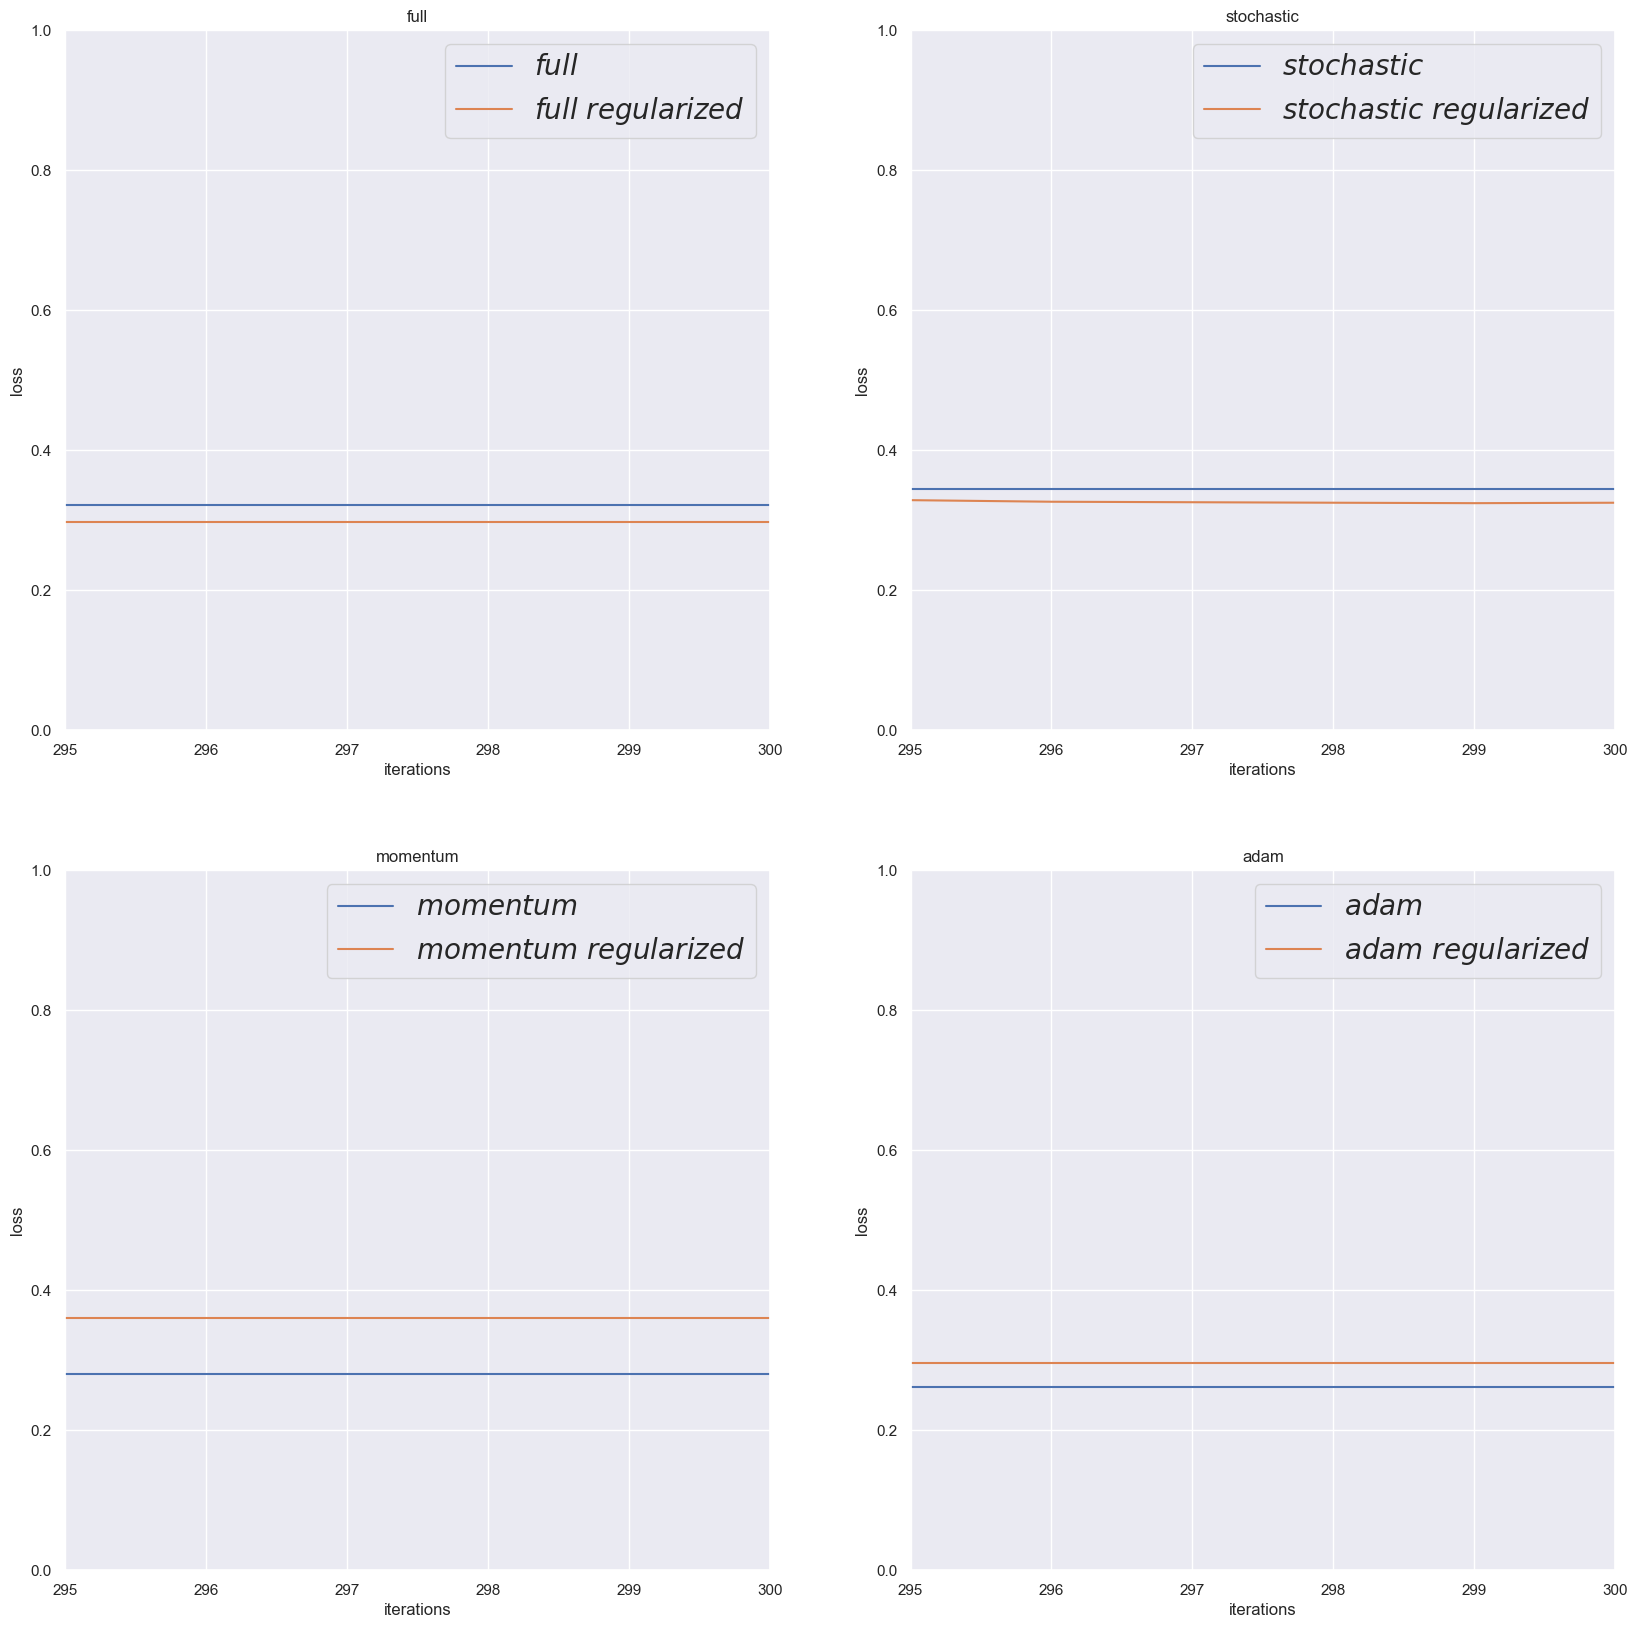

In [192]:
graph = 1
fig = plt.figure(figsize=(20, 20))
for method in methods:
    ax = fig.add_subplot(2, 2, graph)
    ax.set_ylim([0, 1])
    ax.set_xlim([295, 300])
    ax.set(title=f'{method}', xlabel='iterations', ylabel='loss')

    regression_config = {
            'descent_name': method,
            'regularized': False,
            'kwargs': {'dimension': x_val_transform.shape[1], 'lambda_': best_lambdas[method]}
        }
    reg = LinearRegression(regression_config)
    model = reg.fit(x_train_transform, y_train)

    loss = [model.loss_history[-1] for _ in range(301)]
    loss[:len(model.loss_history)] = model.loss_history

    ax.plot(range(301), loss, label=rf'${method}$')

    regression_config = {
            'descent_name': method,
            'regularized': True,
            'kwargs': {'dimension': x_val_transform.shape[1], 'lambda_': best_lambdas[method], 'mu': best_mus[method]}
        }
    reg = LinearRegression(regression_config)
    model = reg.fit(x_train_transform, y_train)

    loss = [model.loss_history[-1] for _ in range(301)]
    loss[:len(model.loss_history)] = model.loss_history

    ax.plot(range(301), loss, label=rf'${method}\ regularized$')
    graph += 1
    ax.legend(fontsize=20)
plt.show()

In [ ]:
# в случае полного и стохастического градиентного спуска регуляризация приводит к уменьшению лоса, но при этом увеличивается кол-во итераций до сходимости.
# в случае моментума и адама ситуация противоположная

`### ваше решение тут ###`

## Задание 8. Альтернативная функция потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$

Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент:
$$
    \nabla_a L(y, a)
    =
    \tanh(a - y)
$$

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

In [ ]:
# YOUR CODE:

### Кулинарно-социализационный бонус. (0.5 балла).

Как мы знаем, осень прекрасная пора, время пробовать новое и делиться теплом с друзьями и близкими. Выберите рецепт, который соответствует вашему настроению, приготовьте выбранное блюдо и угостите хотя бы одного человека им. Кратко опишите ваши впечатления, прикрепите рецепт и фотографии блюда и довольного гостя.

`### ваш кулинарный опыт тут ###`

### Бонус 1. Другие методы градиентного спуска (1 балл).

По желанию выберите метод градиентного спуска из следующего списка и самостоятельно реализуйте его в файле `descents.py`. Обучите линейную регрессию с помощью этого метода, сравните с методами из основной части домашнего задания.

`AdaMax` (вариация Adam основанная на $l_{\infty}$), `Nadam` (вариация Adam совмещенная с методом импульса Нестерова), `AMSGrad` (ещё одна вариация Adam).

In [ ]:
# YOUR CODE:

### Бонус 2. Другие функции потерь (1 балл).

Аналогично 8 заданию реализуйте две функции потерь - **MAE** и **Huber**.

Самостоятельно продифференцируйте данные функции потерь, чтобы найти их градиенты:

`### ваше решение тут ###`

Программно реализуйте градиентный спуск с данными функциями потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Сравните между собой *для каждого метода отдельно* качество для разных функций потерь. Какая оказалась лучше? Как вы думаете почему?

In [ ]:
# YOUR CODE: